In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision' , 2)

# LOAD DATASET

In [2]:
#load the dataset from the google drive
drive_link = "https://drive.google.com/file/d/1HAhPy344qbL52cPwfH4NvBxb6VN3XdLp/view?usp=sharing"

url_path = "https://drive.google.com/uc?id=1HAhPy344qbL52cPwfH4NvBxb6VN3XdLp"

jb_link_org_dataset = pd.read_csv(url_path)

jb_link_org_dataset.head(10)


Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   
5  4412-YLTKF                No                    0                27   
6  0390-DCFDQ               Yes                    1                 1   
7  3445-HXXGF               Yes                    6                58   
8  2656-FMOKZ                No                    0                15   
9  2070-FNEXE                No                    0                 7   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   
5  Offer C           Yes                               3.33            Yes   
6  Offer E           Yes                              15.28             No   
7  Offer B            No                               0.00             No   
8  Offer D           Yes                              44.07            Yes   
9  Offer E           Yes                              26.95             No   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   
2              Yes   Fiber Optic                       57              No   
3              Yes   Fiber Optic                       13              No   
4              Yes         Cable                       15              No   
5              Yes   Fiber Optic                       20              No   
6              Yes         Cable                       33              No   
7              Yes         Cable                       26              No   
8              Yes         Cable                       21              No   
9              Yes           DSL                       20             Yes   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   
2            No                     No                   No          Yes   
3           Yes                    Yes                   No          Yes   
4            No                     No                   No           No   
5            No                    Yes                   No           No   
6            No                     No                   No           No   
7           Yes                    Yes                   No           No   
8            No                     No                   No           No   
9            No                     No                   No           No   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   
2              Yes             Yes            Yes  Month-to-Month   
3              Yes              No             No  Month-to-Month   
4               No              No             No  Month-to-Month   
5               No              No             No  Month-to-Month   
6               No              No             No  Month-to-Month   
7              Yes              No             No  Month-to-Month   
8               No    

In [3]:
jb_link_org_dataset.shape

(7043, 46)

In [4]:
jb_link_org_dataset.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Churn Value', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction'],
      dtype='object')

In [5]:
#removed unwanted columns and unused features

unused_var = ['Customer ID', 'City', 'Zip Code' , 'Churn Category', 'Churn Reason']
jb_link_org_dataset.drop(columns=unused_var, inplace=True)


In [6]:
jb_link_org_dataset.head(2)

Referred a Friend  Number of Referrals  Tenure in Months    Offer  \
0                No                    0                 1     None   
1               Yes                    1                 8  Offer E   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            No                               0.00             No   
1           Yes                              48.85            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Regular Charges  \
0               Yes  Bank Withdrawal           41.24                  39.65   
1               Yes      Credit Card           83.88                 633.30   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0            0.0                       0.0                          0.0   
1            0.0                     120.0                        390.8   

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   

   Number of Dependents  Latitude  Longitude  Population  Churn Value  CLTV  \
0                     0     34.02    -118.16       68701            1  5433   
1                     1     34.04    -118.19       55668            1  5302   

   Total Customer Svc Requests  Product/Service Issues Reported  \
0                            5                                0   
1                            5                                0   

   Customer Satisfaction  
0                    NaN  
1                    NaN

In [7]:
jb_link_org_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [8]:
jb_link_org_dataset.describe()

Number of Referrals  Tenure in Months  \
count              7043.00           7043.00   
mean                  1.95             32.39   
std                   3.00             24.54   
min                   0.00              1.00   
25%                   0.00              9.00   
50%                   0.00             29.00   
75%                   3.00             55.00   
max                  11.00             72.00   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                            7043.00                  7043.00   
mean                               22.96                    21.11   
std                                15.45                    20.95   
min                                 0.00                     0.00   
25%                                 9.21                     3.00   
50%                                22.89                    17.00   
75%                                36.39                    28.00   
max                                49.99                    94.00   

       Monthly Charge  Total Regular Charges  Total Refunds  \
count         7043.00                7043.00        7043.00   
mean            65.54                2280.38           1.96   
std             30.61                2266.22           7.90   
min             18.25                  18.80           0.00   
25%             35.89                 400.15           0.00   
50%             71.97                1394.55           0.00   
75%             90.65                3786.60           0.00   
max            123.08                8684.80          49.79   

       Total Extra Data Charges  Total Long Distance Charges      Age  \
count                   7043.00                      7043.00  7043.00   
mean                     278.50                       749.10    46.51   
std                      685.04                       846.66    16.75   
min                        0.00                         0.00    19.00   
25%                        0.00                        70.55    32.00   
50%                        0.00                       401.44    46.00   
75%                      182.62                      1191.10    60.00   
max                     6477.00                      3564.72    80.00   

       Number of Dependents  Latitude  Longitude  Population  Churn Value  \
count               7043.00   7043.00    7043.00     7043.00      7043.00   
mean                   0.47     36.20    -119.76    22139.60         0.27   
std                    0.96      2.47       2.15    21152.39         0.44   
min                    0.00     32.56    -124.30       11.00         0.00   
25%                    0.00     33.99    -121.79     2344.00         0.00   
50%                    0.00     36.21    -119.60    17554.00         0.00   
75%                    0.00     38.16    -117.97    36125.00         1.00   
max                    9.00     41.96    -114.19   105285.00         1.00   

          CLTV  Total Customer Svc Requests  Product/Service Issues Reported  \
count  7043.00                      7043.00                          7043.00   
mean   4400.30                         1.34                             0.31   
std    1183.06                         1.43                             0.72   
min    2003.00                         0.00                             0.00   
25%    3469.00                         0.00                             0.00   
50%    4527.00                         1.00                             0.00   
75%    5380.50                         2.00                             0.00   
max    6500.00                         9.00                             6.00   

       Customer Satisfaction  
count                1834.00  
mean                    3.01  
std                     1.26  
min                     1.00  
25%                     2.00  
50%                     3.00  
75%                     4.00  
max                     5.00

In [9]:
jb_link_org_dataset.describe(include='object')

Referred a Friend Offer Phone Service Multiple Lines Internet Service  \
count               7043  7043          7043           7043             7043   
unique                 2     6             2              2                2   
top                   No  None           Yes             No              Yes   
freq                3821  3877          6361           4072             5517   

       Internet Type Online Security Online Backup Device Protection Plan  \
count           7043            7043          7043                   7043   
unique             4               2             2                      2   
top      Fiber Optic              No            No                     No   
freq            2291            5024          4614                   4621   

       Premium Tech Support Streaming TV Streaming Movies Streaming Music  \
count                  7043         7043             7043            7043   
unique                    2            2                2               2   
top                      No           No               No              No   
freq                   4999         4336             4311            4555   

       Unlimited Data        Contract Paperless Billing   Payment Method  \
count            7043            7043              7043             7043   
unique              2               3                 2                3   
top                No  Month-to-Month               Yes  Bank Withdrawal   
freq             4339            3610              4171             3909   

       Gender Under 30 Senior Citizen Married Dependents  
count    7043     7043           7043    7043       7043  
unique      2        2              2       2          2  
top      Male       No             No      No         No  
freq     3555     5642           5901    3641       5416

In [10]:
#missing values

total_missing_Val = jb_link_org_dataset.isnull().sum().sort_values(ascending=False)
missing_precentage = (jb_link_org_dataset.isnull().sum() / jb_link_org_dataset.isnull().count() * 100).sort_values(ascending=False)

missing_val_df = pd.concat([total_missing_Val, missing_precentage] , keys=["total", "%"], axis=1)
missing_val_df.head(10)

total      %
Customer Satisfaction         5209  73.96
Monthly Charge                   0   0.00
Total Refunds                    0   0.00
Total Extra Data Charges         0   0.00
Total Long Distance Charges      0   0.00
Gender                           0   0.00
Age                              0   0.00
Under 30                         0   0.00
Senior Citizen                   0   0.00
Married                          0   0.00

In [11]:
#drop the the missing values which is more than 70%
jb_link_org_dataset.drop(columns=["Customer Satisfaction"], inplace=True)

In [12]:
jb_link_org_dataset.isnull().sum().sum()

0

In [13]:
jb_link_org_dataset.head(2)

Referred a Friend  Number of Referrals  Tenure in Months    Offer  \
0                No                    0                 1     None   
1               Yes                    1                 8  Offer E   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            No                               0.00             No   
1           Yes                              48.85            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Regular Charges  \
0               Yes  Bank Withdrawal           41.24                  39.65   
1               Yes      Credit Card           83.88                 633.30   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0            0.0                       0.0                          0.0   
1            0.0                     120.0                        390.8   

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   

   Number of Dependents  Latitude  Longitude  Population  Churn Value  CLTV  \
0                     0     34.02    -118.16       68701            1  5433   
1                     1     34.04    -118.19       55668            1  5302   

   Total Customer Svc Requests  Product/Service Issues Reported  
0                            5                                0  
1                            5                                0

In [14]:
jb_link_org_dataset.dtypes

Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Charge                       float64
Total Regu

In [15]:
def variables_separation(dataFrame):
    #initialize the list to store the varibales of int and object
    int_vars = []
    obj_vars = []
    
    for cloumn in dataFrame.columns:
        
        if dataFrame[cloumn].dtype == "int64" or dataFrame[cloumn].dtype == "float64":
            int_vars.append(cloumn)
        else:
            obj_vars.append(cloumn)
            
    return int_vars, obj_vars    

int_variables , obj_variables = variables_separation(jb_link_org_dataset)
    

In [16]:
int_variables

['Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Regular Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Age',
 'Number of Dependents',
 'Latitude',
 'Longitude',
 'Population',
 'Churn Value',
 'CLTV',
 'Total Customer Svc Requests',
 'Product/Service Issues Reported']

In [17]:
obj_variables

['Referred a Friend',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Gender',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents']

## Exploratory Data Analysis

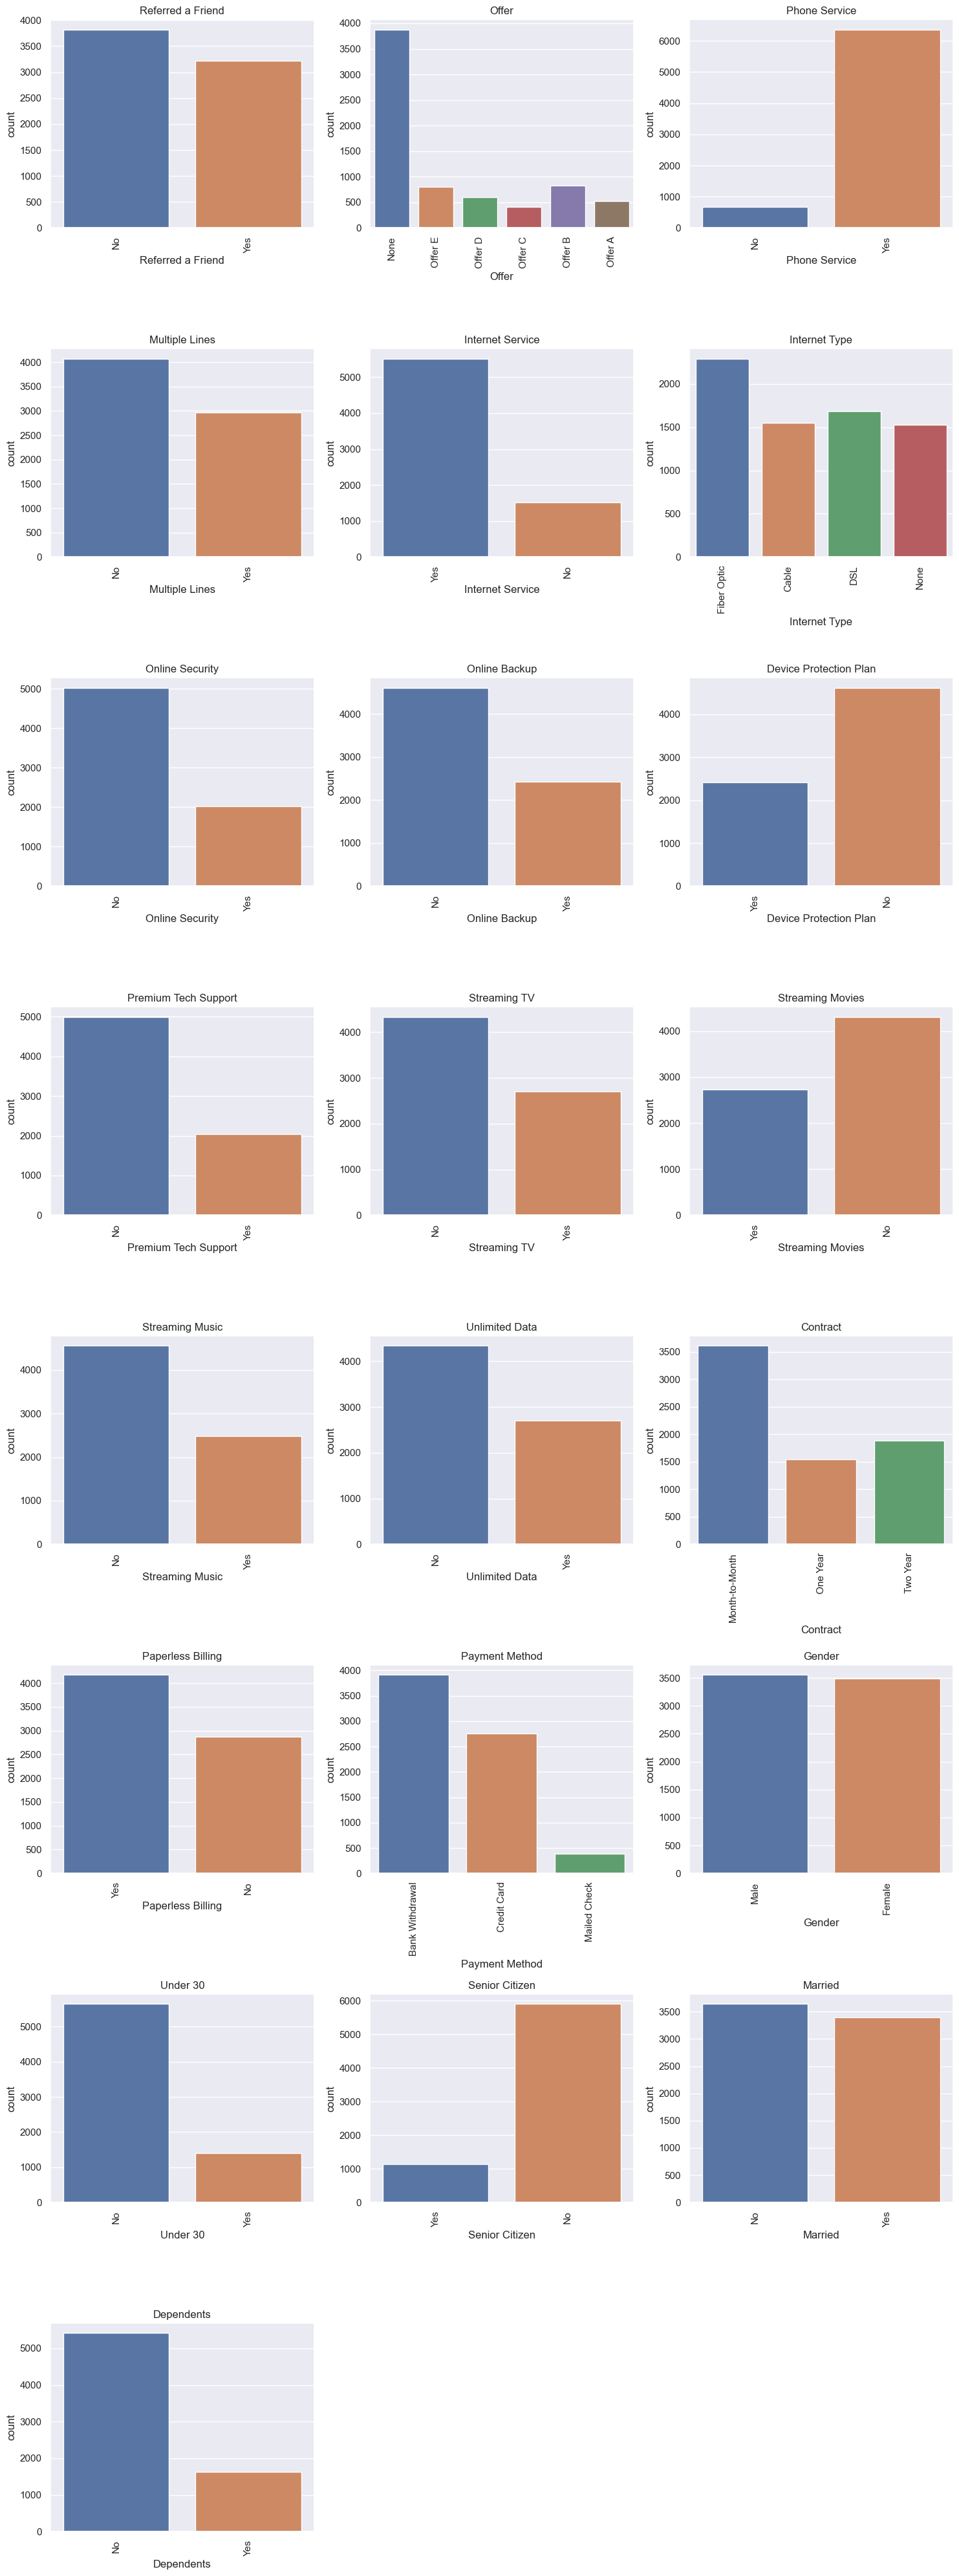

In [18]:
# Create a figure with subplots
num_cols = len(obj_variables)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(obj_variables):
    top_values = jb_link_org_dataset[var].value_counts().index
    filtered_df = jb_link_org_dataset[jb_link_org_dataset[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

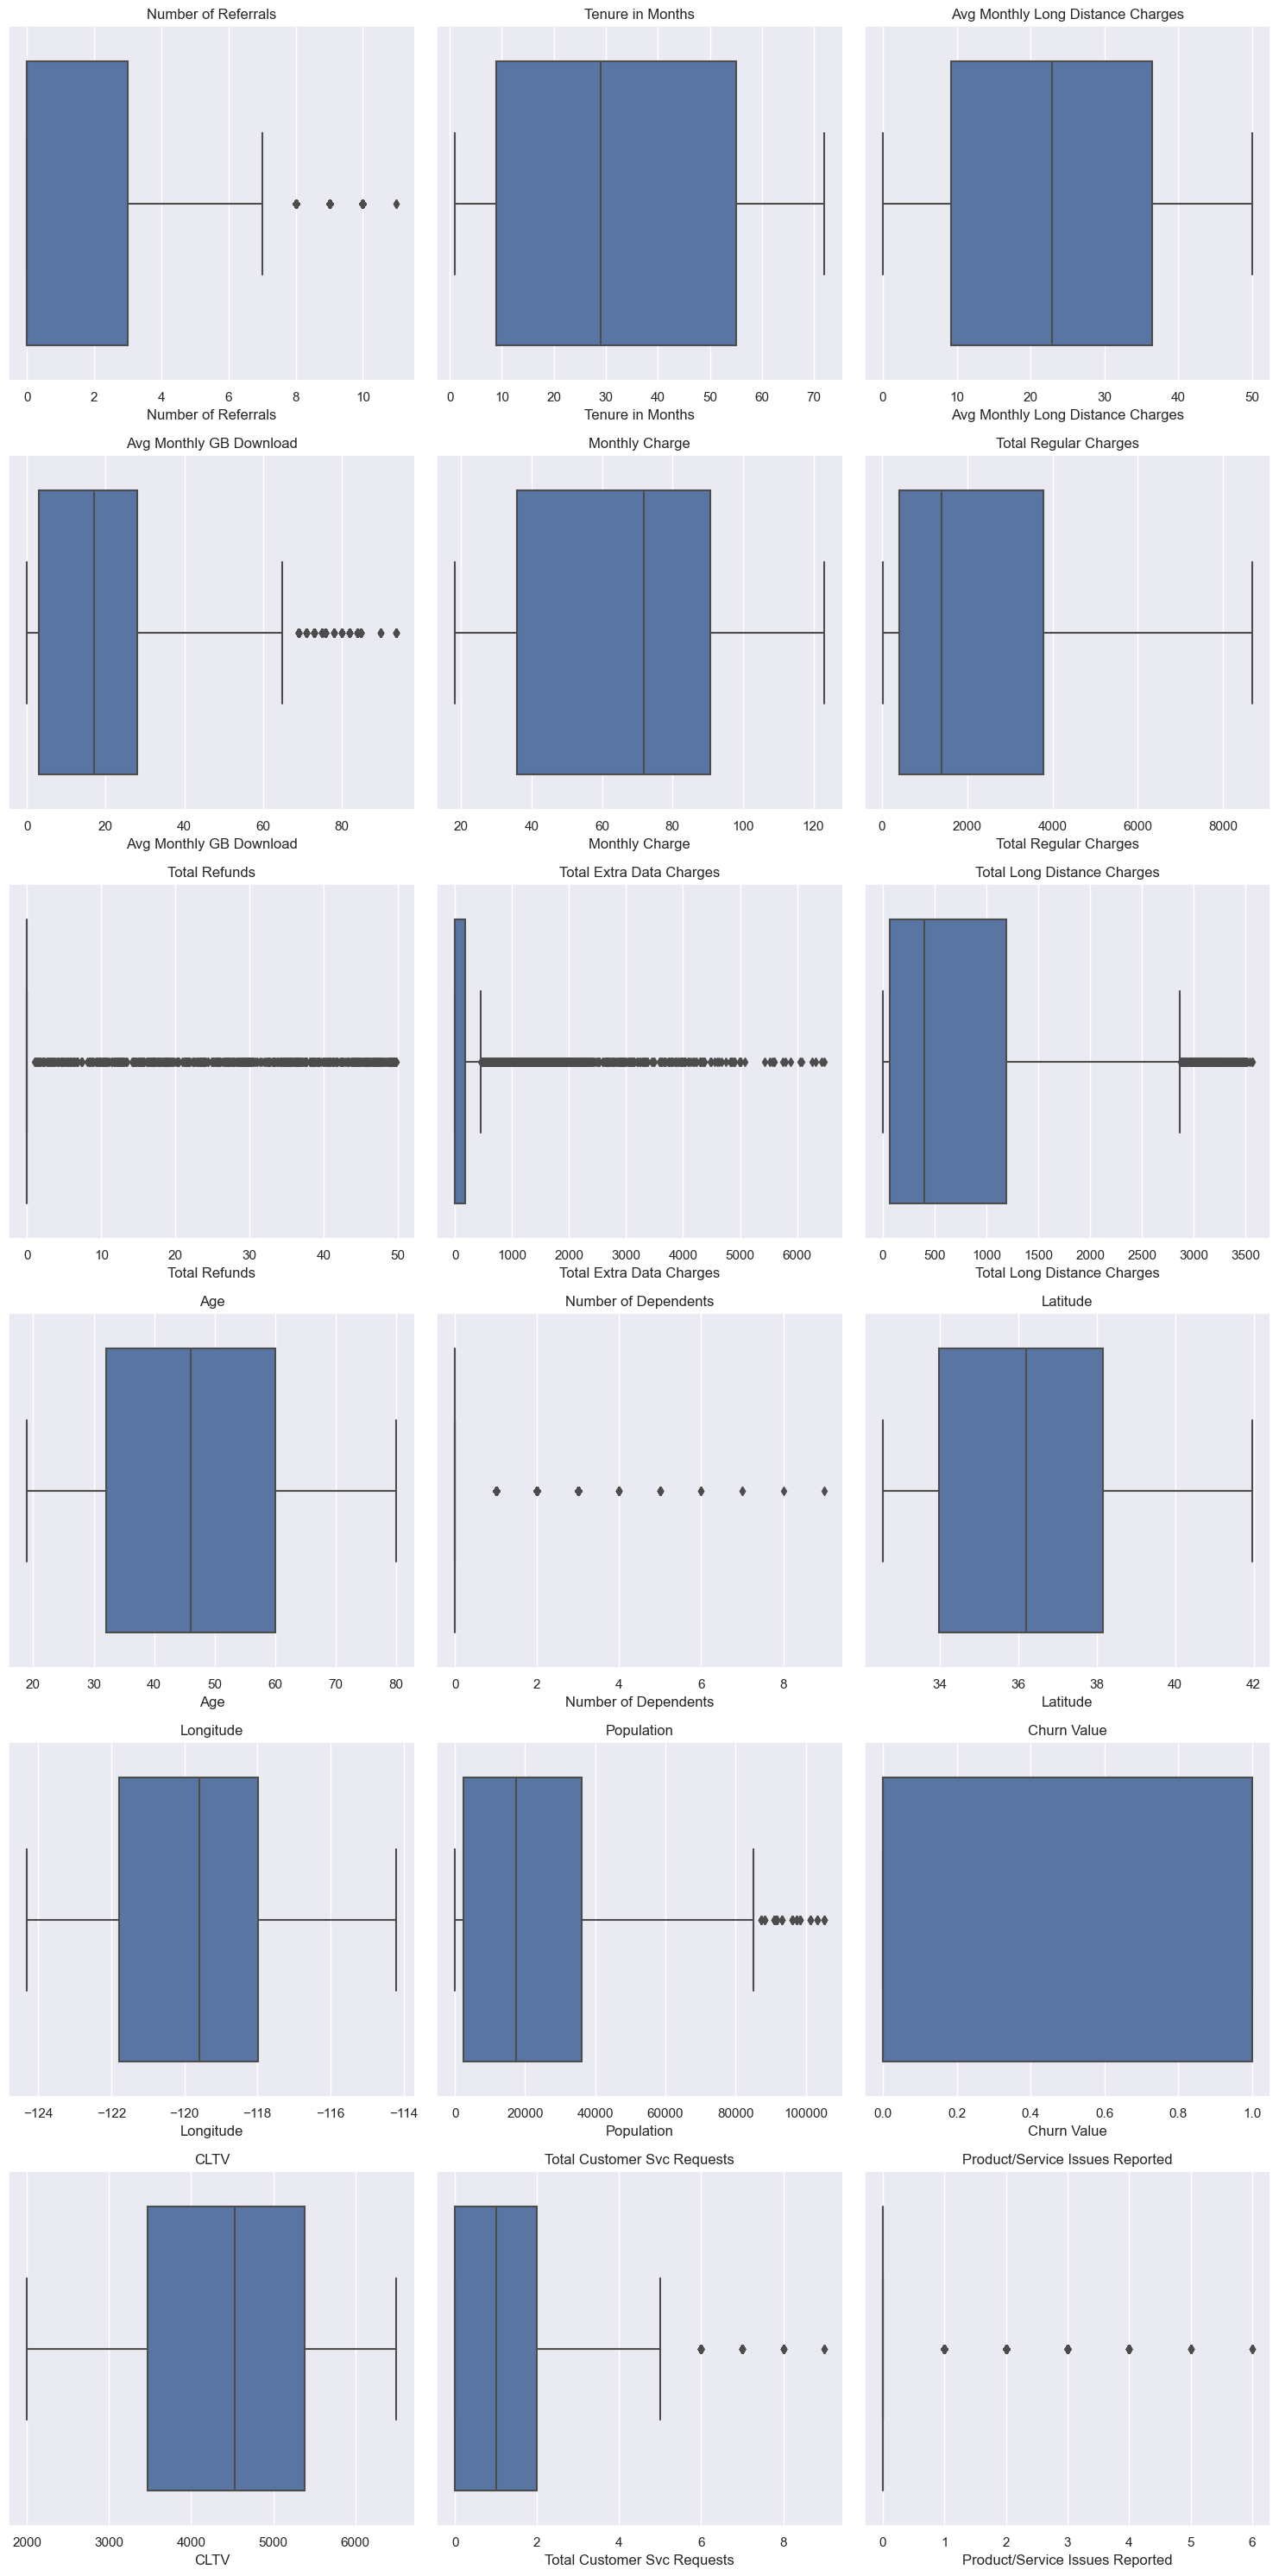

In [19]:
# Create a figure with subplots
num_cols = len(int_variables)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(int_variables):
    sns.boxplot(x=jb_link_org_dataset[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

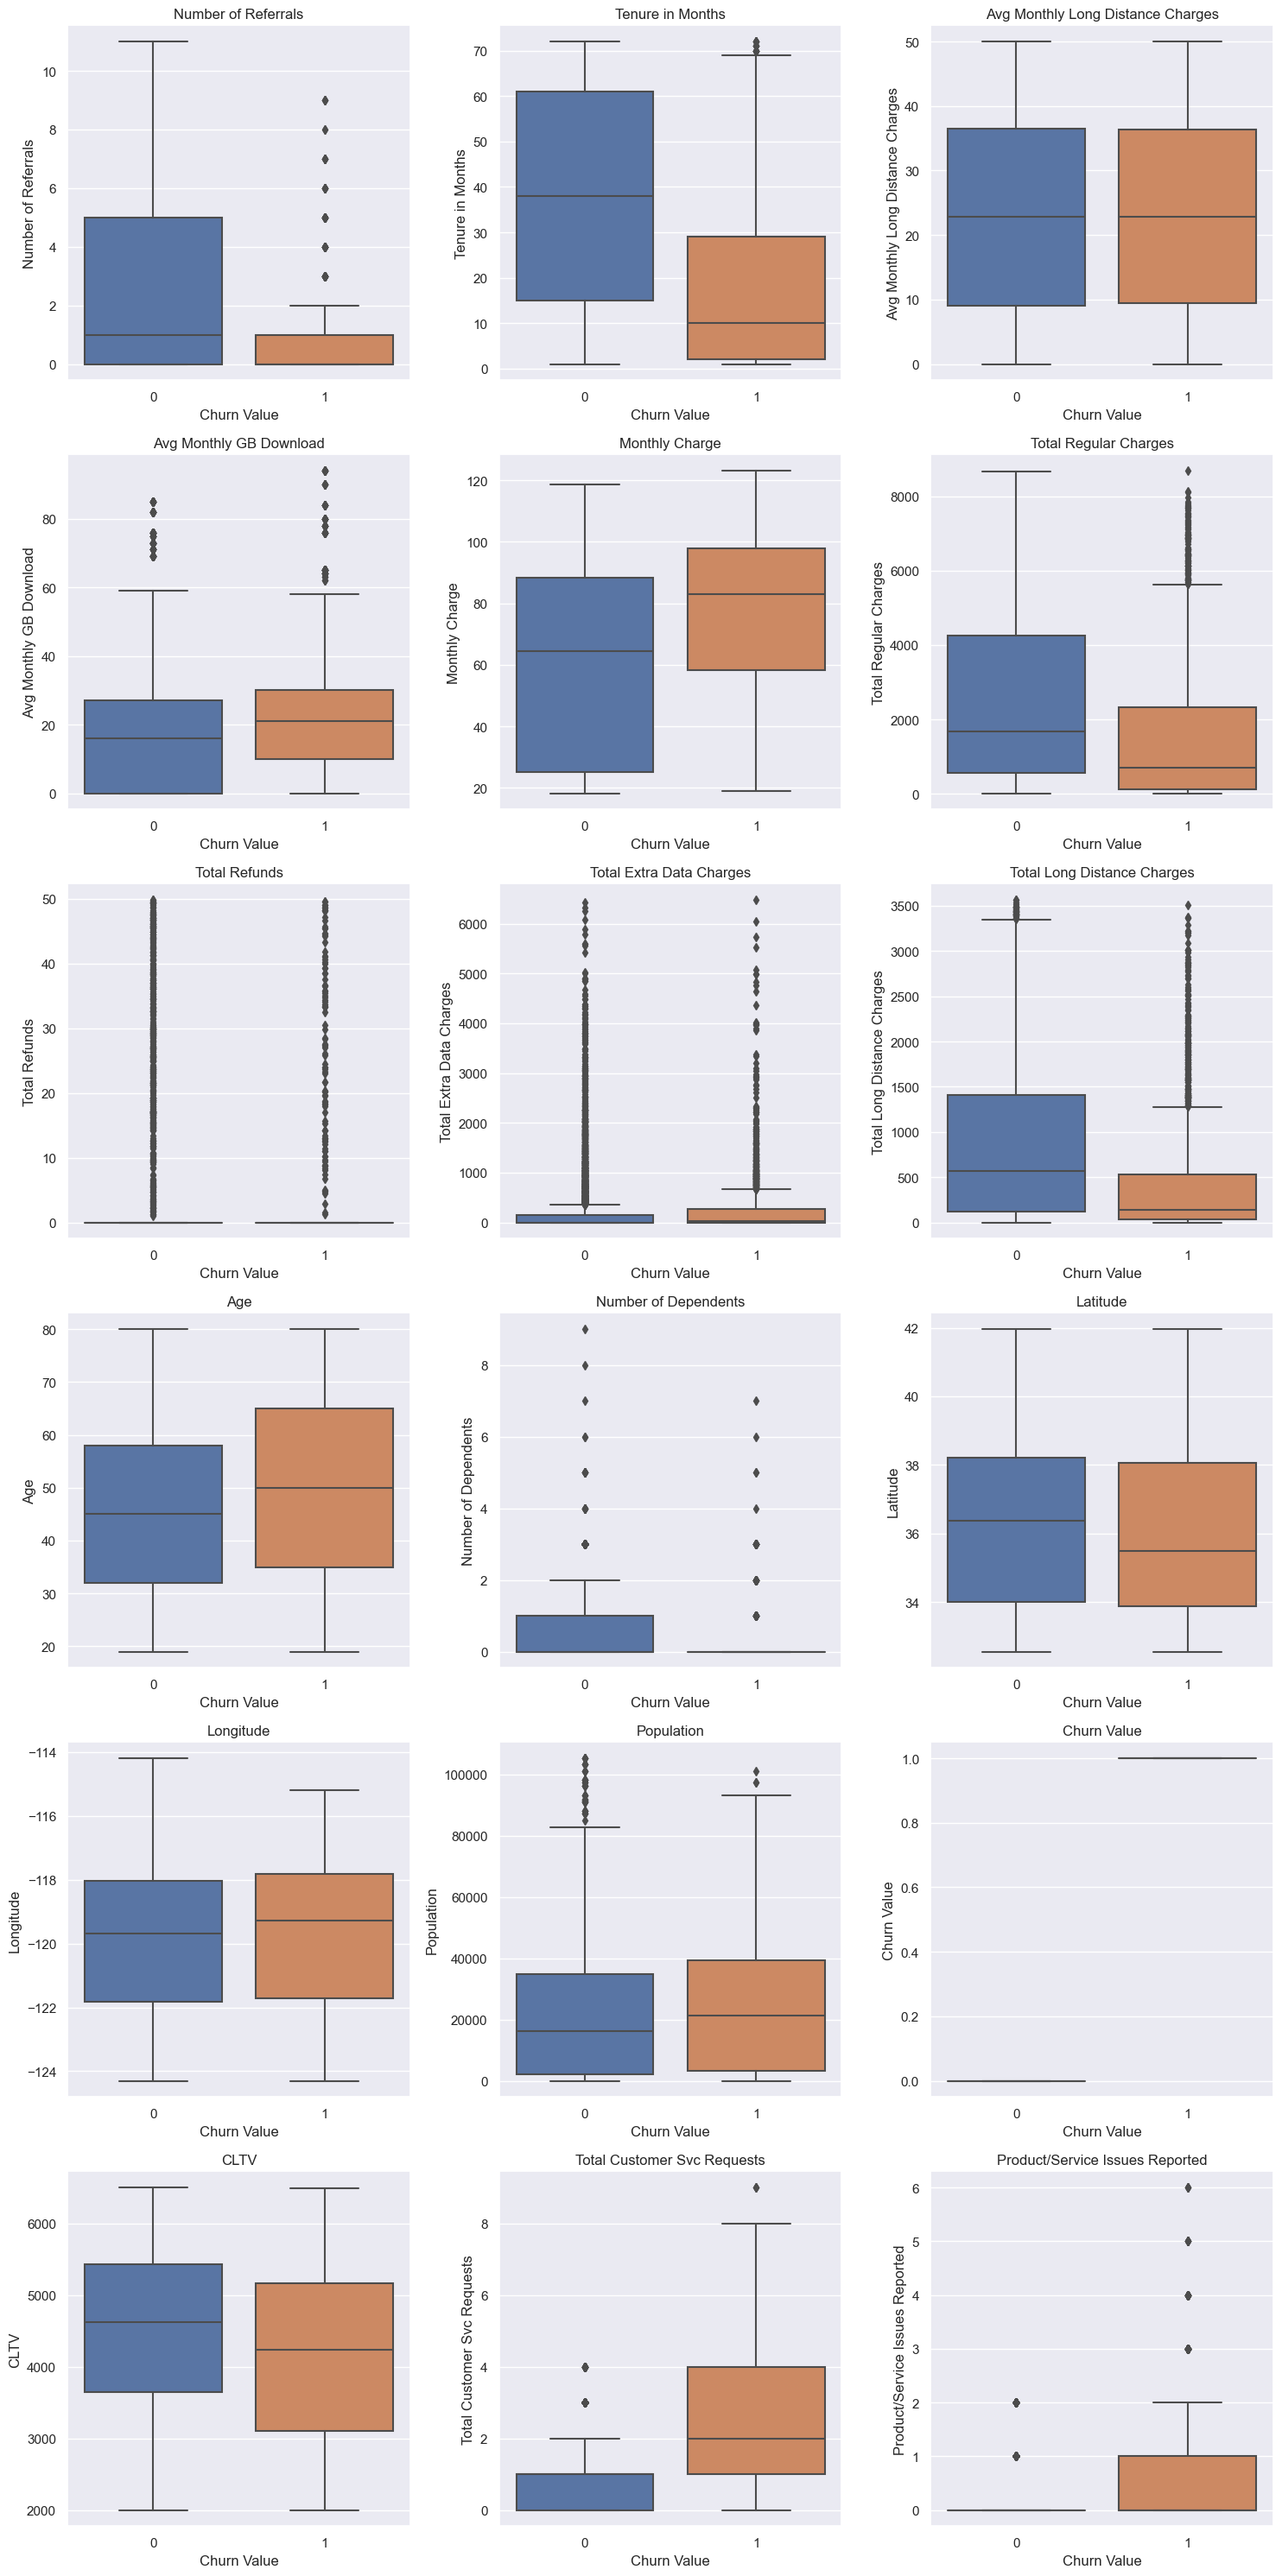

In [20]:
# Create a figure with subplots
num_cols = len(int_variables)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_variables):
    sns.boxplot(y=var, x='Churn Value', data=jb_link_org_dataset, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

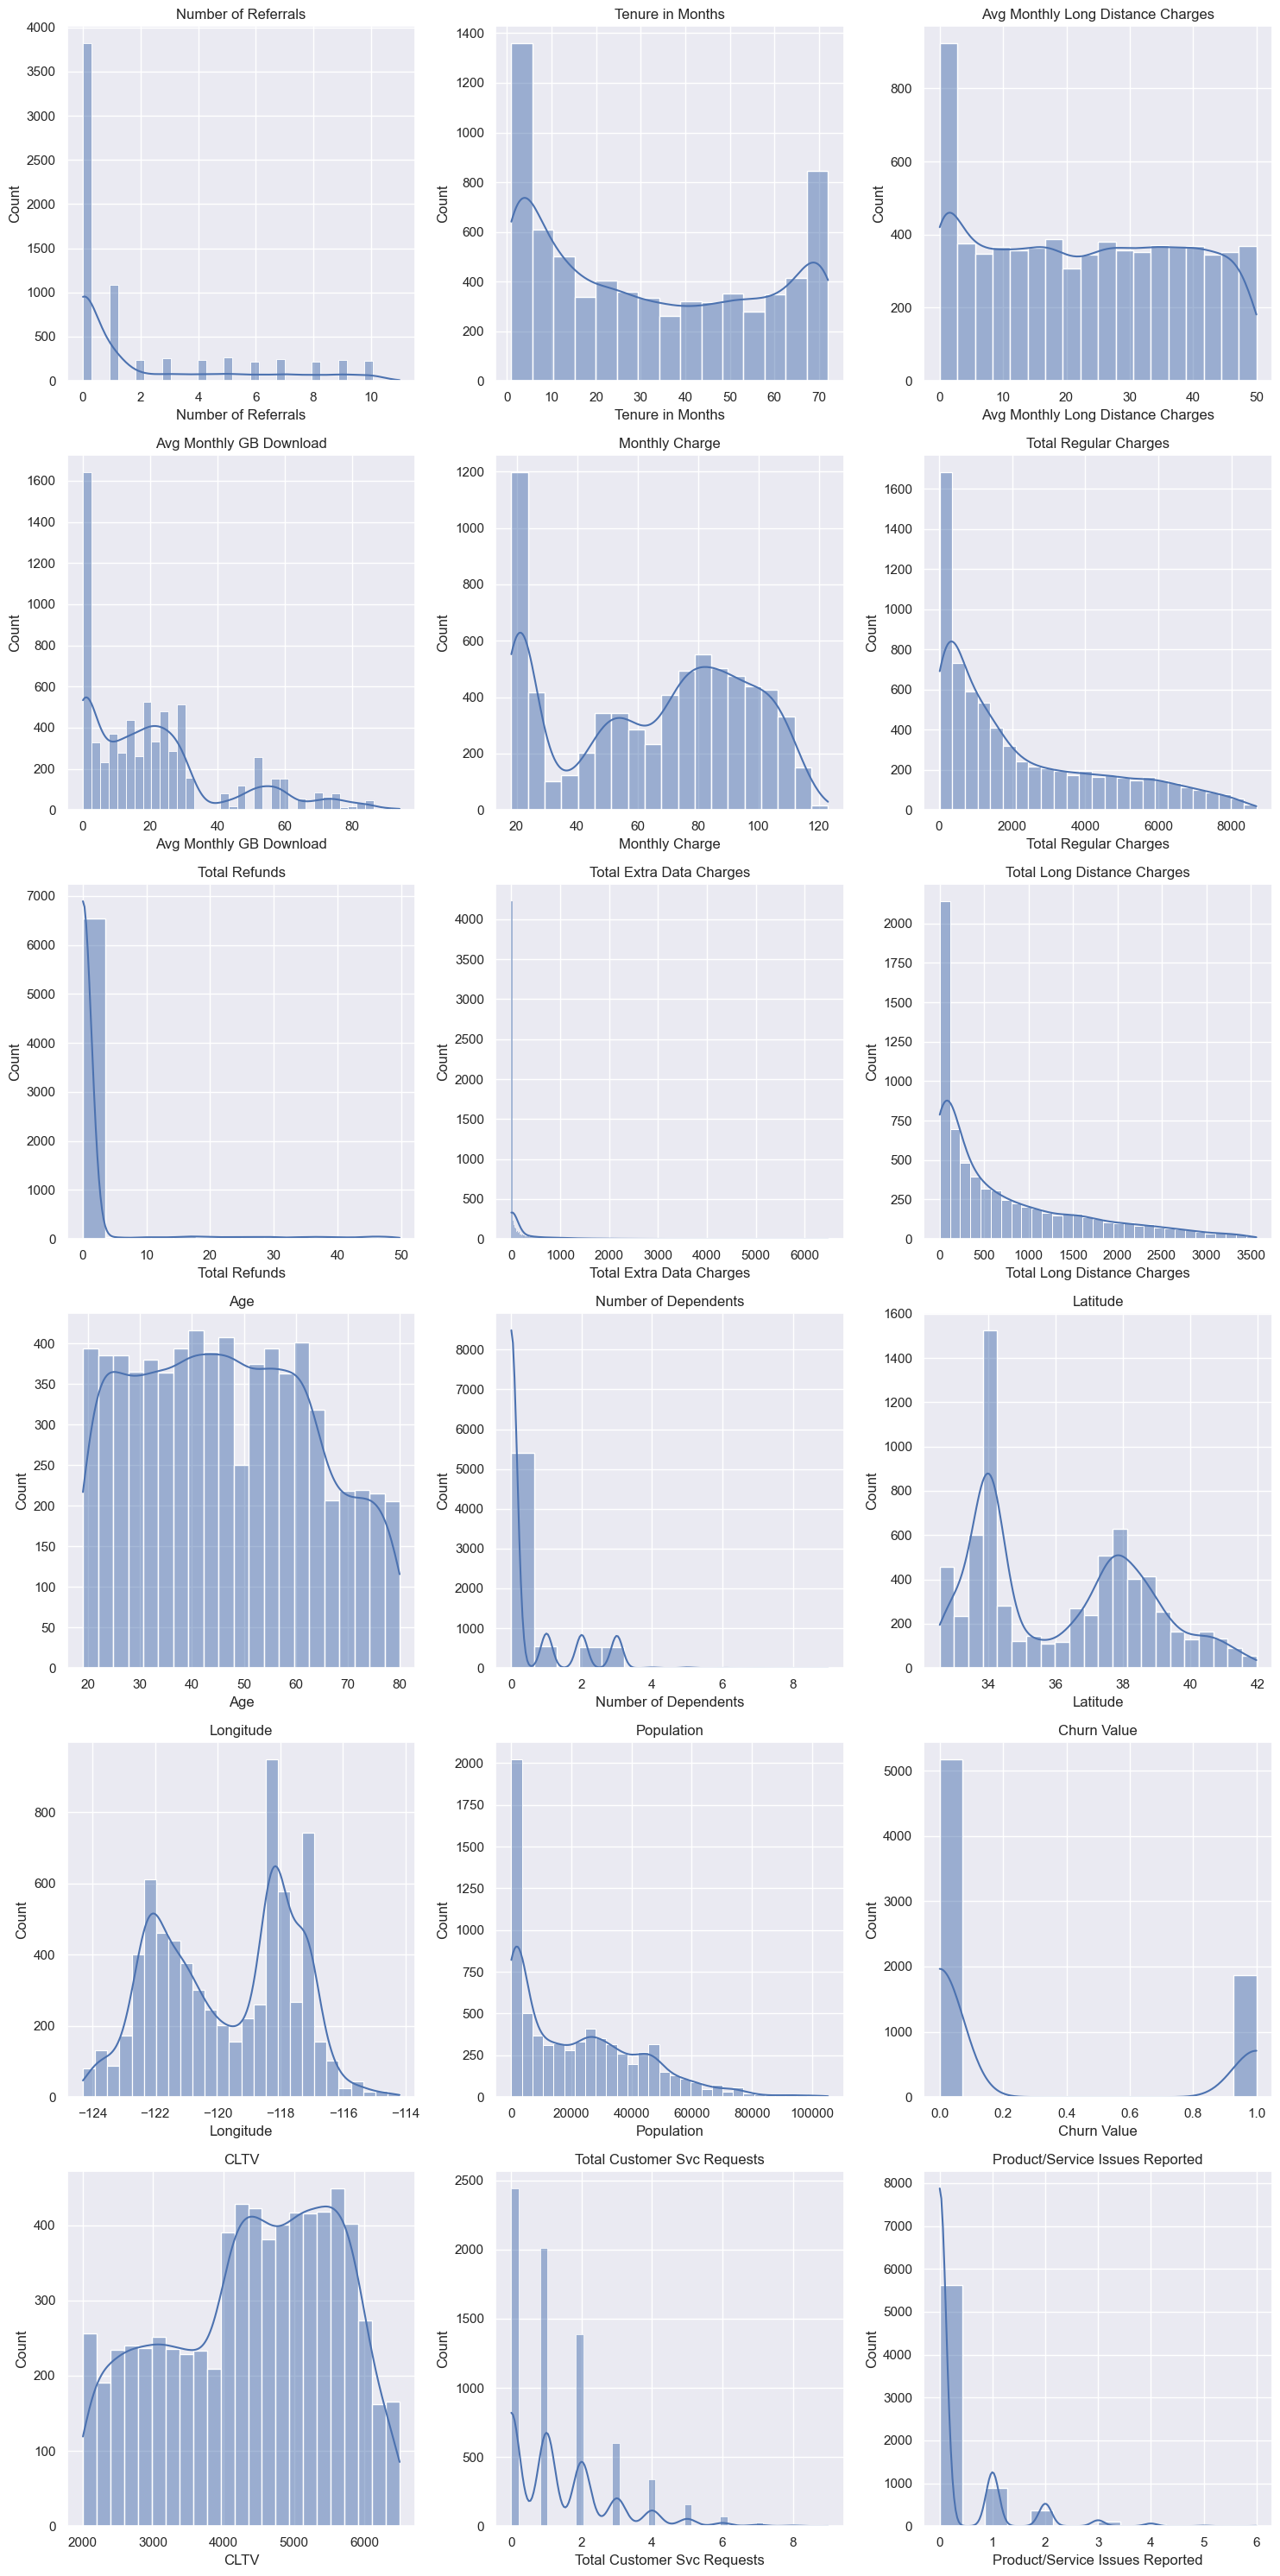

In [21]:
# Create a figure with subplots
num_cols = len(int_variables)
num_rows = (num_cols + 2) // 3 
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable using sns.histplot
for i, var in enumerate(int_variables):
    sns.histplot(data=jb_link_org_dataset, x=var, ax=axs[i], kde=True)  # Use sns.histplot for histograms with KDE
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

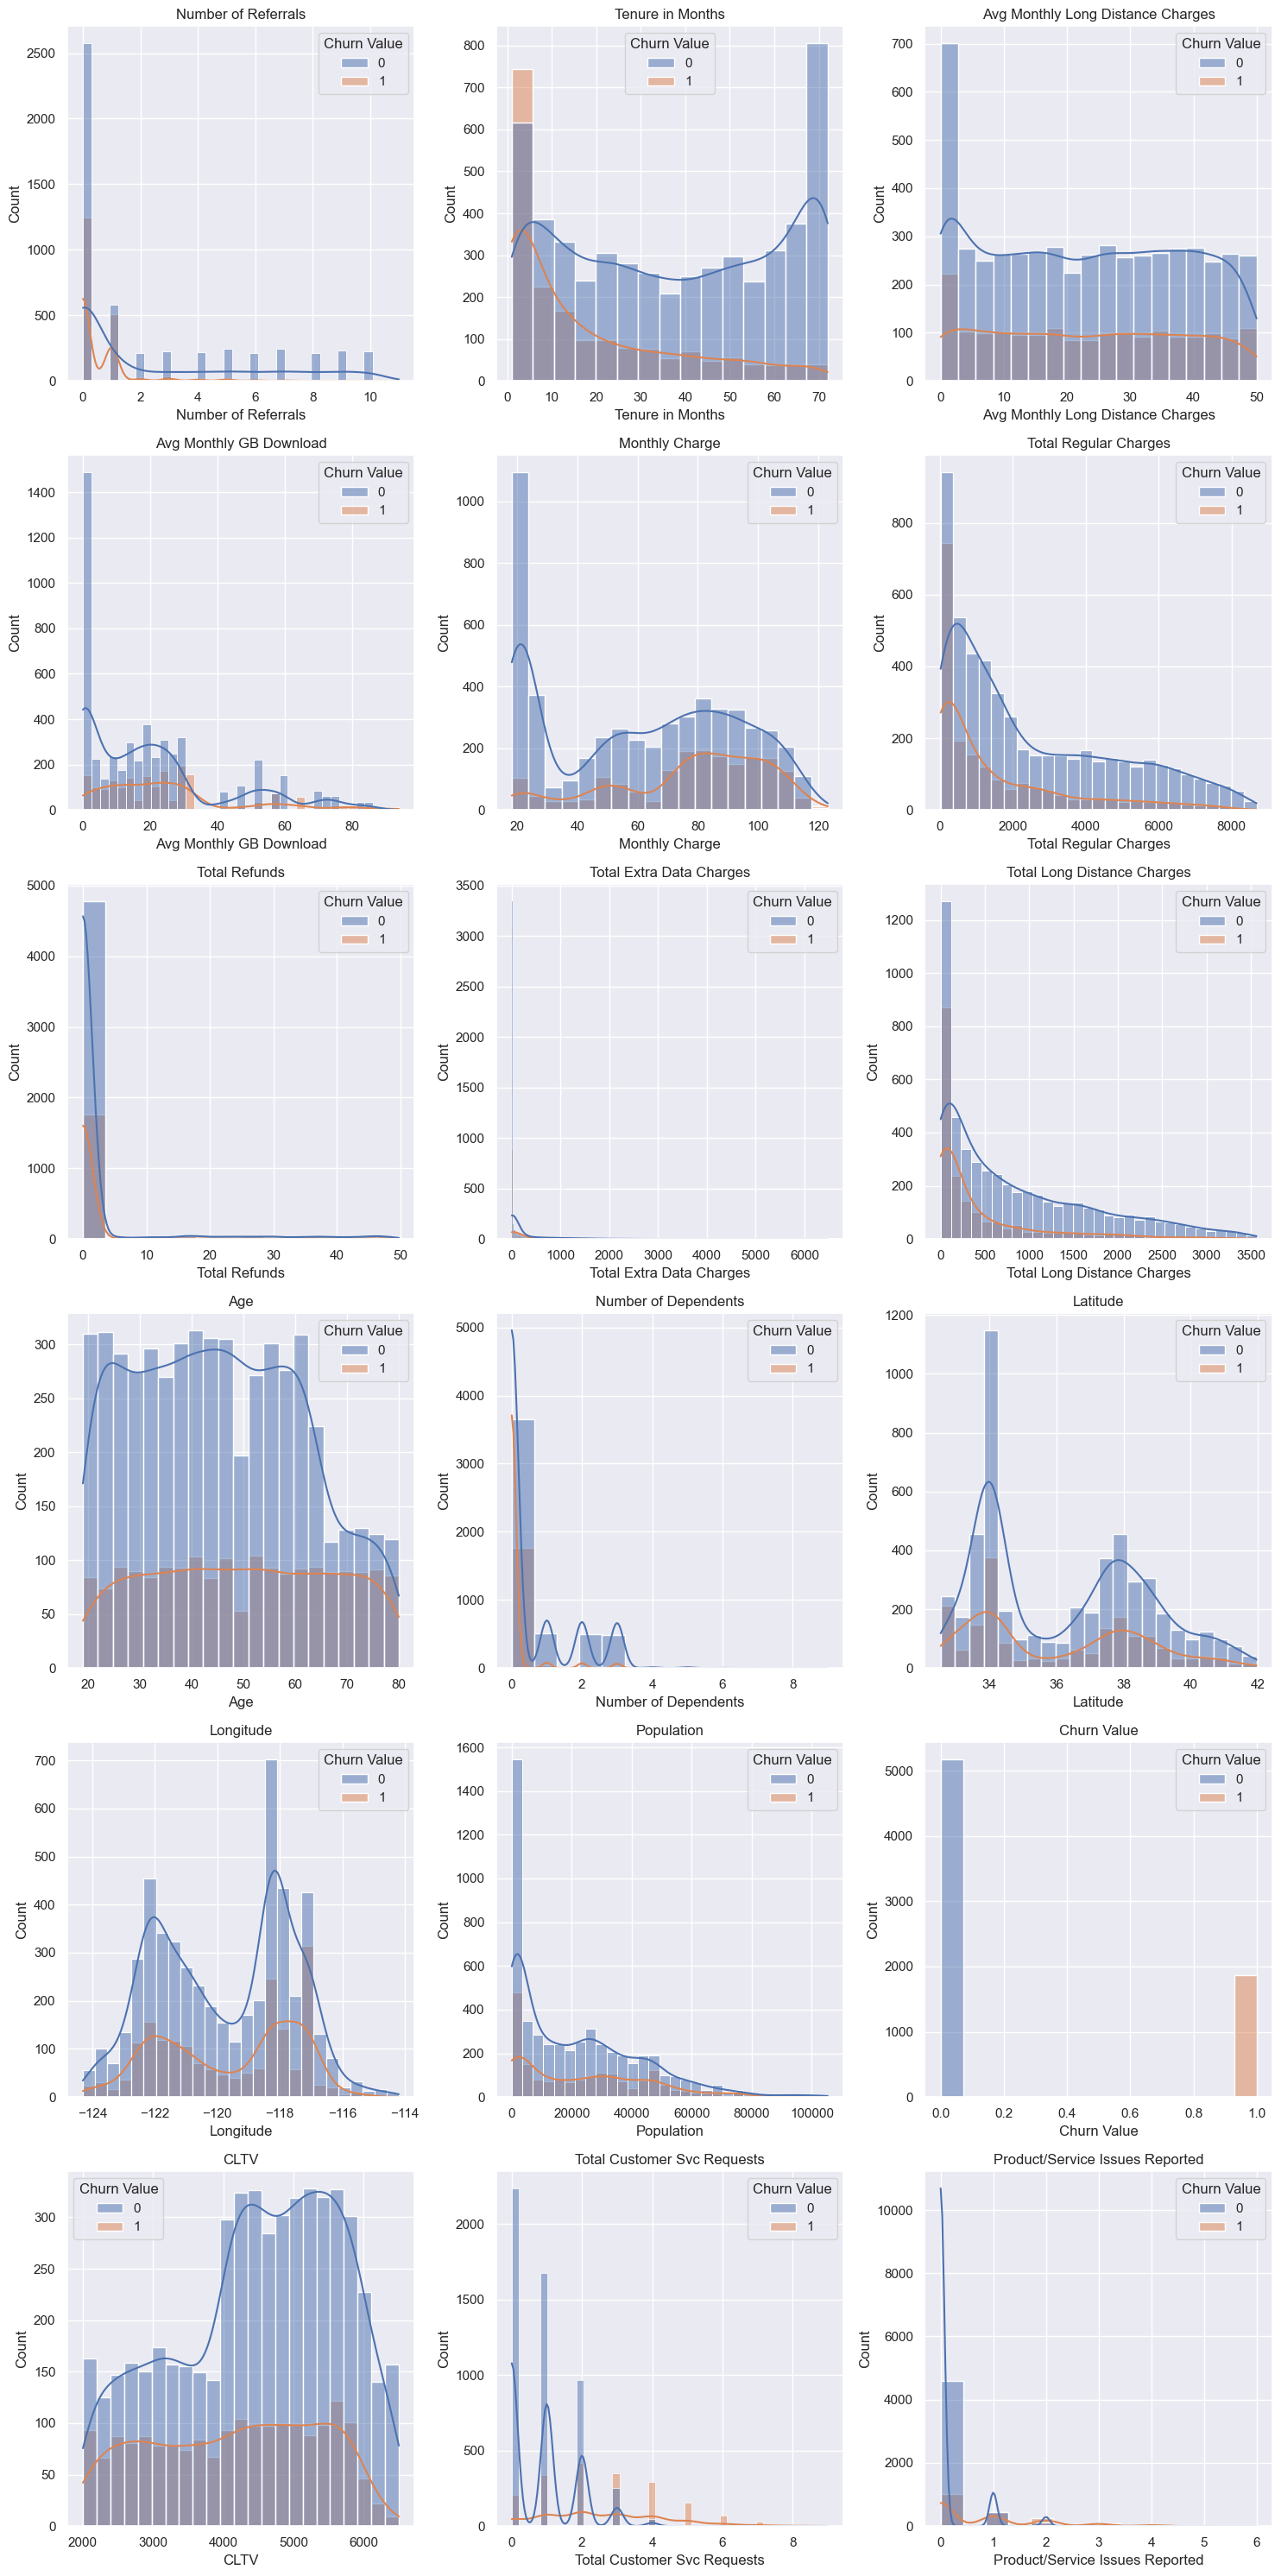

In [22]:


# Create a figure with subplots
num_cols = len(int_variables)
num_rows = (num_cols + 2) // 3  
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_variables):
    sns.histplot(data=jb_link_org_dataset, x=var, hue='Churn Value', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

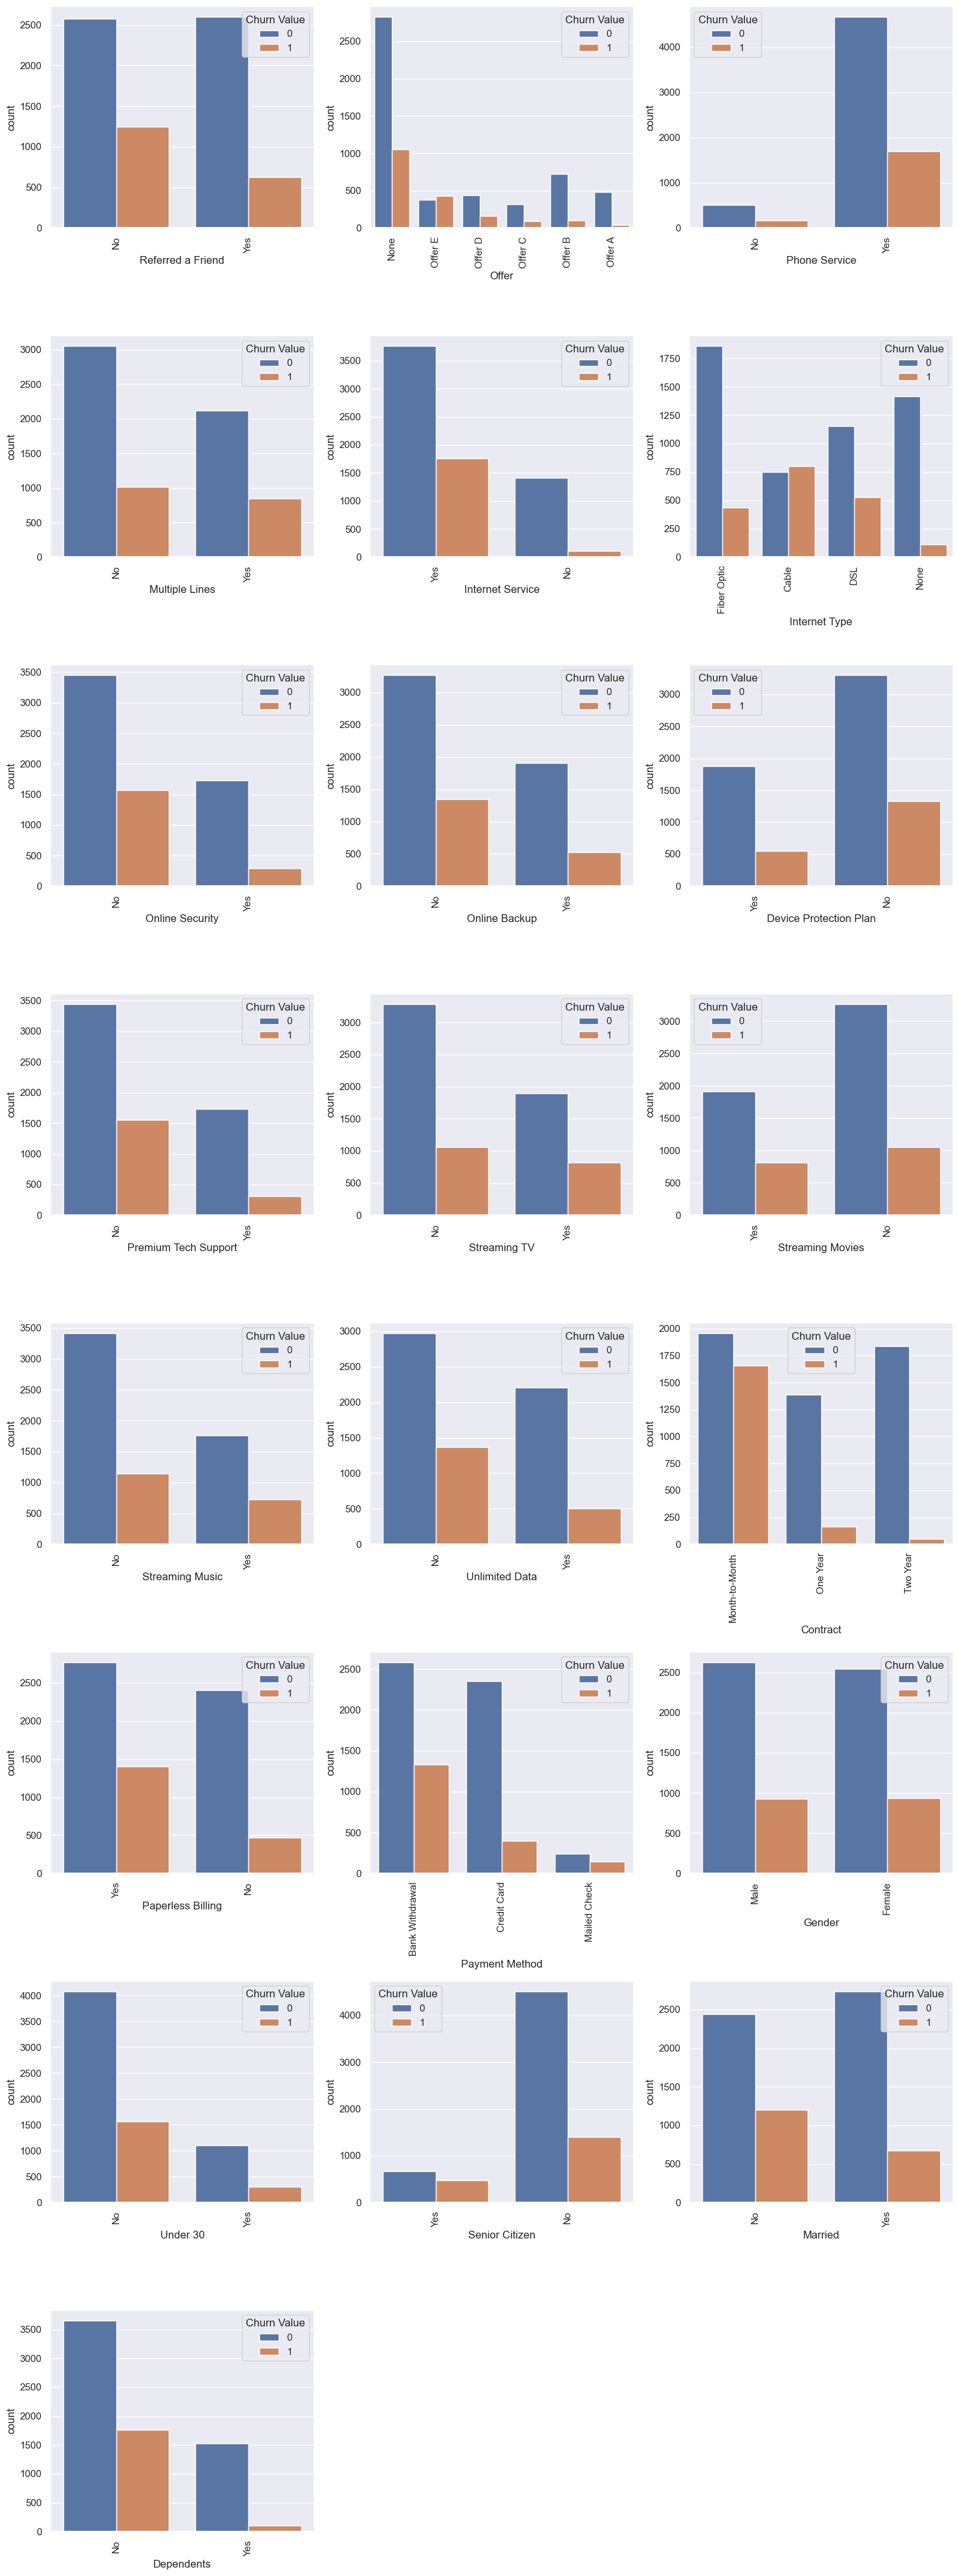

In [23]:
cat_vars = obj_variables
if 'Churn Value' in cat_vars:
    cat_vars.remove('Churn Value')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for each categorical variable
for i, var in enumerate(cat_vars):
    filtered_df = jb_link_org_dataset[jb_link_org_dataset[var].notnull()]  # Exclude rows with NaN values in the variable
    sns.countplot(x=var, hue='Churn Value', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

C:\Users\samee\AppData\Local\Temp\ipykernel_52944\275795964.py:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


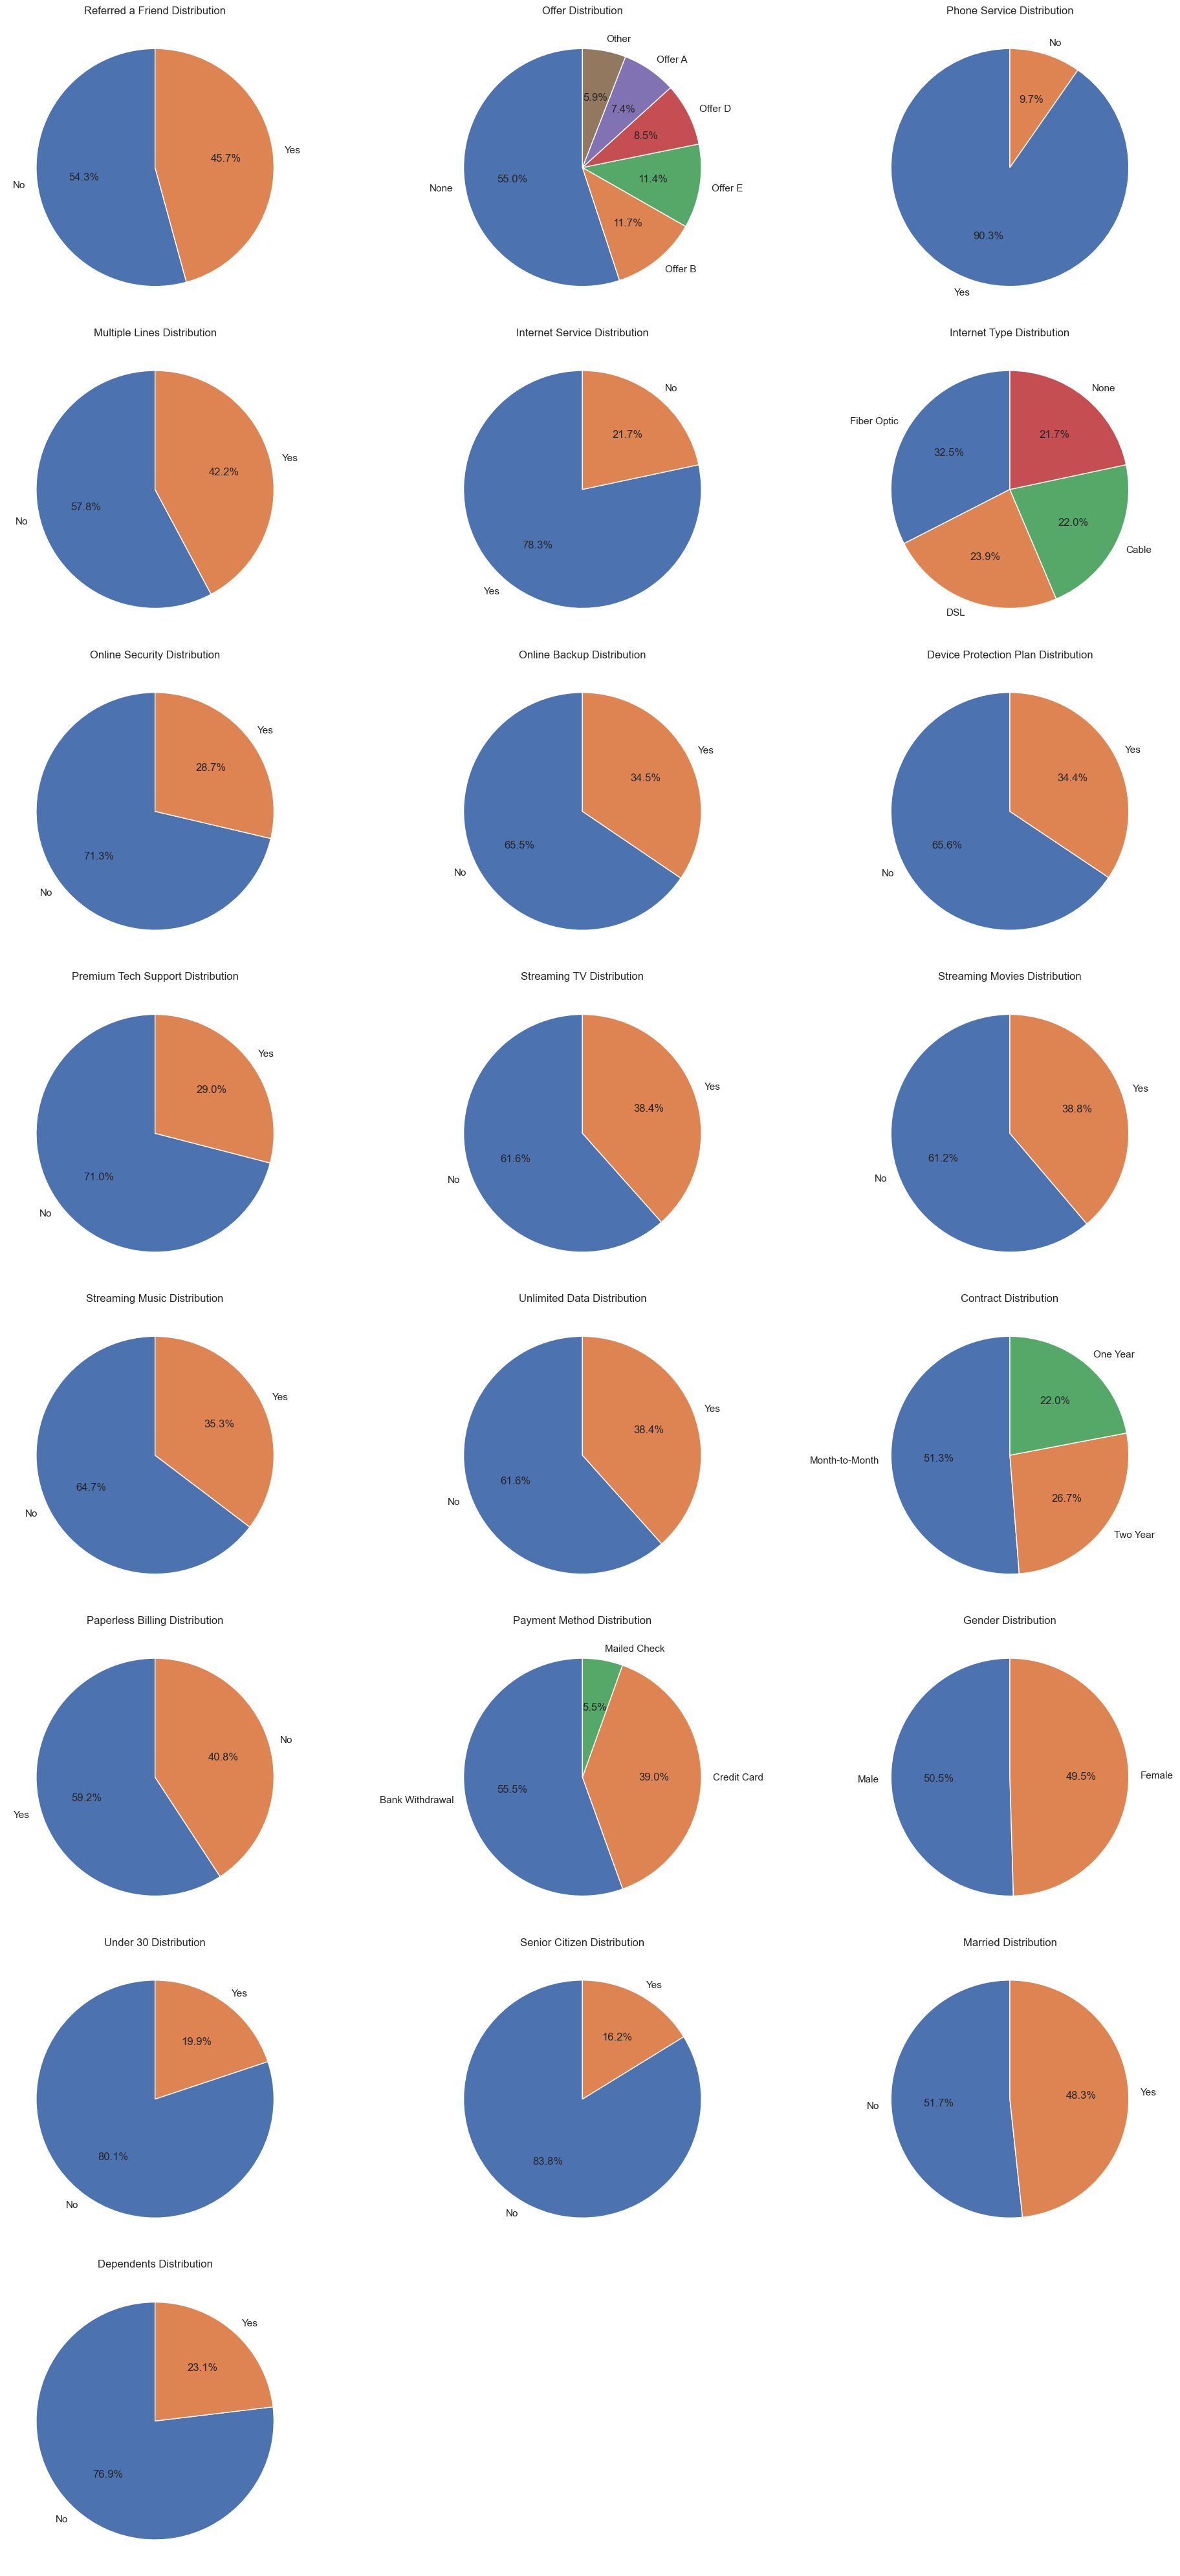

In [24]:
# Specify the maximum number of categories to show individually
import warnings
max_categories = 5

# Create a figure with subplots
num_cols = len(obj_variables)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(obj_variables):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = jb_link_org_dataset[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

## Label Encoding for Object Datatypes

In [25]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in obj_variables:
    # Print the column name and the unique values
    print(f"{col}: {jb_link_org_dataset[col].unique()}")

Referred a Friend: ['No' 'Yes']
Offer: ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Phone Service: ['No' 'Yes']
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes' 'No']
Internet Type: ['Fiber Optic' 'Cable' 'DSL' 'None']
Online Security: ['No' 'Yes']
Online Backup: ['No' 'Yes']
Device Protection Plan: ['Yes' 'No']
Premium Tech Support: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Streaming Movies: ['Yes' 'No']
Streaming Music: ['No' 'Yes']
Unlimited Data: ['No' 'Yes']
Contract: ['Month-to-Month' 'One Year' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
Gender: ['Male' 'Female']
Under 30: ['No' 'Yes']
Senior Citizen: ['Yes' 'No']
Married: ['No' 'Yes']
Dependents: ['No' 'Yes']


In [26]:
jb_link_org_dataset.head(3)

Referred a Friend  Number of Referrals  Tenure in Months    Offer  \
0                No                    0                 1     None   
1               Yes                    1                 8  Offer E   
2                No                    0                18  Offer D   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            No                               0.00             No   
1           Yes                              48.85            Yes   
2           Yes                              11.33            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   
2              Yes   Fiber Optic                       57              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   
2            No                     No                   No          Yes   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   
2              Yes             Yes            Yes  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Regular Charges  \
0               Yes  Bank Withdrawal           41.24                  39.65   
1               Yes      Credit Card           83.88                 633.30   
2               Yes  Bank Withdrawal           99.27                1752.55   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       0.0                         0.00   
1           0.00                     120.0                       390.80   
2          45.61                       0.0                       203.94   

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   
2    Male   71       No            Yes      No        Yes   

   Number of Dependents  Latitude  Longitude  Population  Churn Value  CLTV  \
0                     0     34.02    -118.16       68701            1  5433   
1                     1     34.04    -118.19       55668            1  5302   
2                     3     34.11    -118.23       47534            1  3179   

   Total Customer Svc Requests  Product/Service Issues Reported  
0                            5                                0  
1                            5                                0  
2                            1                                0

In [27]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in obj_variables:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(jb_link_org_dataset[col].unique())
    
    # Transform the column using the encoder
    jb_link_org_dataset[col] = label_encoder.transform(jb_link_org_dataset[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {jb_link_org_dataset[col].unique()}")

Referred a Friend: [0 1]
Offer: [0 5 4 3 2 1]
Phone Service: [0 1]
Multiple Lines: [0 1]
Internet Service: [1 0]
Internet Type: [2 0 1 3]
Online Security: [0 1]
Online Backup: [0 1]
Device Protection Plan: [1 0]
Premium Tech Support: [0 1]
Streaming TV: [0 1]
Streaming Movies: [1 0]
Streaming Music: [0 1]
Unlimited Data: [0 1]
Contract: [0 1 2]
Paperless Billing: [1 0]
Payment Method: [0 1 2]
Gender: [1 0]
Under 30: [0 1]
Senior Citizen: [1 0]
Married: [0 1]
Dependents: [0 1]


In [28]:
jb_link_org_dataset.head(3)

Referred a Friend  Number of Referrals  Tenure in Months  Offer  \
0                  0                    0                 1      0   
1                  1                    1                 8      5   
2                  0                    0                18      4   

   Phone Service  Avg Monthly Long Distance Charges  Multiple Lines  \
0              0                               0.00               0   
1              1                              48.85               1   
2              1                              11.33               1   

   Internet Service  Internet Type  Avg Monthly GB Download  Online Security  \
0                 1              2                        9                0   
1                 1              0                       19                0   
2                 1              2                       57                0   

   Online Backup  Device Protection Plan  Premium Tech Support  Streaming TV  \
0              0                       1                     0             0   
1              1                       0                     0             0   
2              0                       0                     0             1   

   Streaming Movies  Streaming Music  Unlimited Data  Contract  \
0                 1                0               0         0   
1                 0                0               0         0   
2                 1                1               1         0   

   Paperless Billing  Payment Method  Monthly Charge  Total Regular Charges  \
0                  1               0           41.24                  39.65   
1                  1               1           83.88                 633.30   
2                  1               0           99.27                1752.55   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       0.0                         0.00   
1           0.00                     120.0                       390.80   
2          45.61                       0.0                       203.94   

   Gender  Age  Under 30  Senior Citizen  Married  Dependents  \
0       1   78         0               1        0           0   
1       0   74         0               1        1           1   
2       1   71         0               1        0           1   

   Number of Dependents  Latitude  Longitude  Population  Churn Value  CLTV  \
0                     0     34.02    -118.16       68701            1  5433   
1                     1     34.04    -118.19       55668            1  5302   
2                     3     34.11    -118.23       47534            1  3179   

   Total Customer Svc Requests  Product/Service Issues Reported  
0                            5                                0  
1                            5                                0  
2                            1                                0

## correlation 

<Axes: >

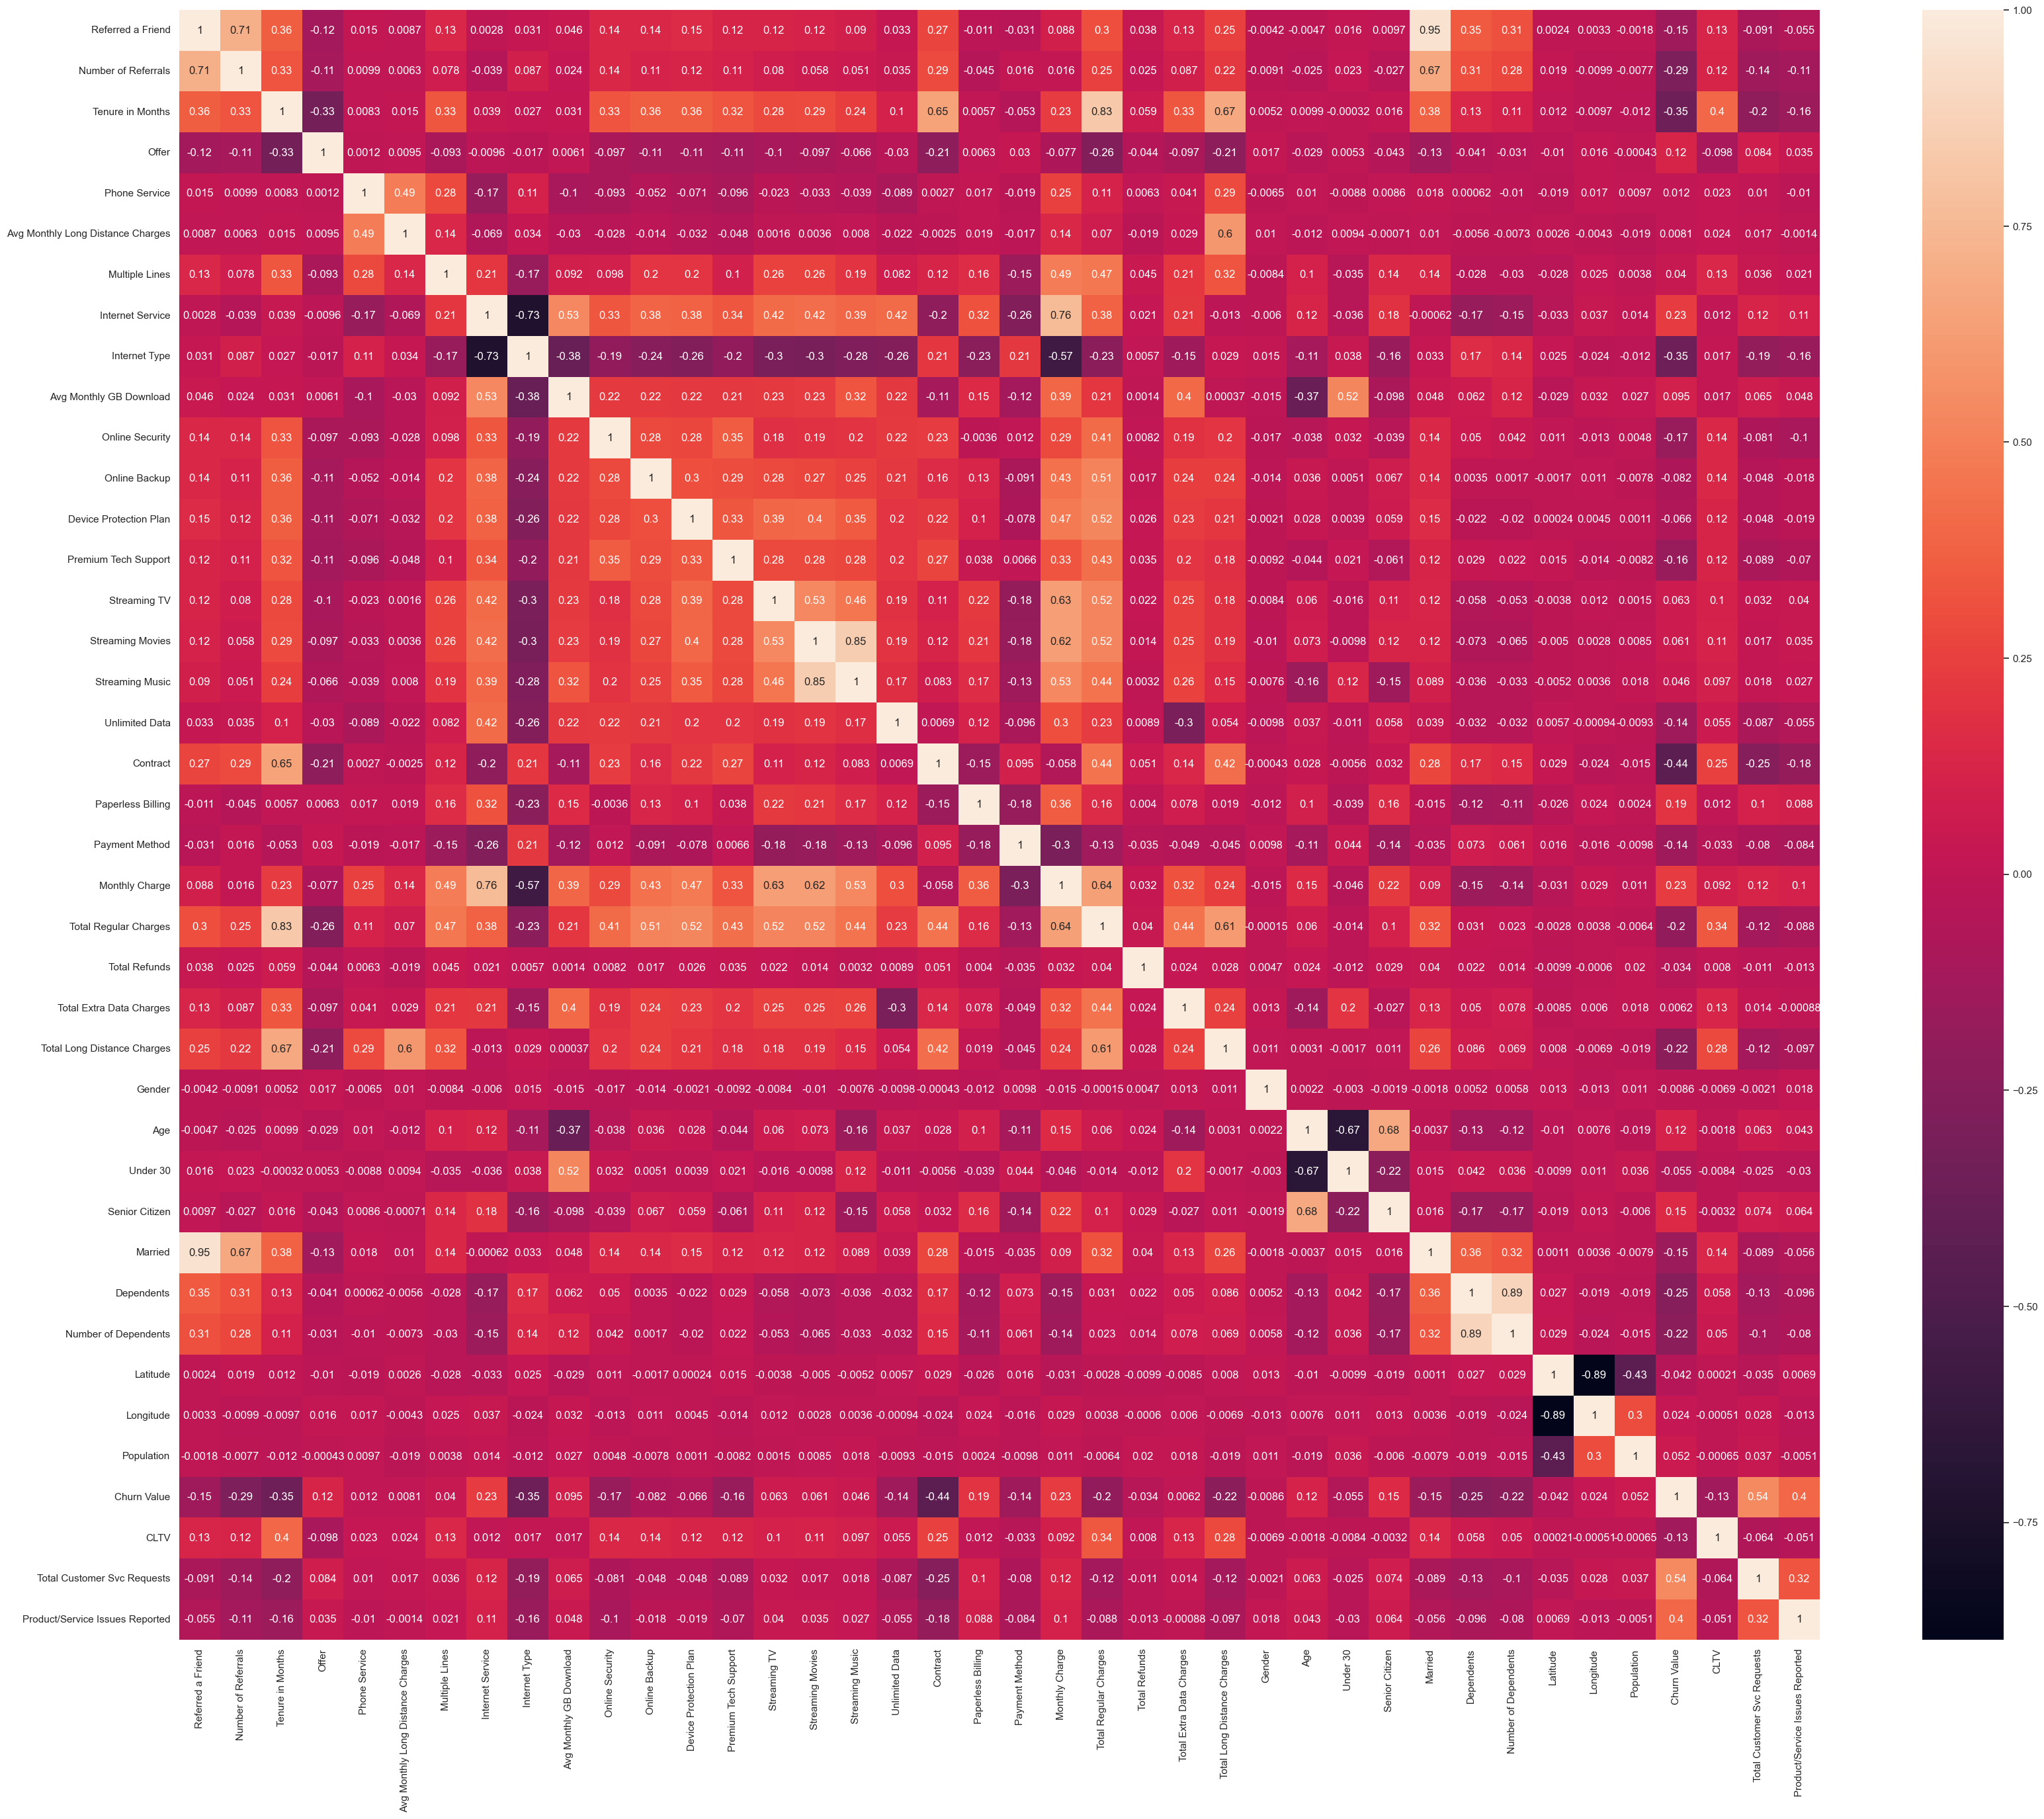

In [29]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(jb_link_org_dataset.corr(), fmt='.2g', annot=True)

In [30]:
correaltion_martix = jb_link_org_dataset.drop(obj_variables, axis=1).iloc[:, :-1].corr()
correaltion_martix.head(4)

Number of Referrals  Tenure in Months  \
Number of Referrals                           1.00e+00              0.33   
Tenure in Months                              3.27e-01              1.00   
Avg Monthly Long Distance Charges             6.34e-03              0.01   
Avg Monthly GB Download                       2.41e-02              0.03   

                                   Avg Monthly Long Distance Charges  \
Number of Referrals                                         6.34e-03   
Tenure in Months                                            1.46e-02   
Avg Monthly Long Distance Charges                           1.00e+00   
Avg Monthly GB Download                                    -2.97e-02   

                                   Avg Monthly GB Download  Monthly Charge  \
Number of Referrals                                   0.02            0.02   
Tenure in Months                                      0.03            0.23   
Avg Monthly Long Distance Charges                    -0.03            0.14   
Avg Monthly GB Download                               1.00            0.39   

                                   Total Regular Charges  Total Refunds  \
Number of Referrals                                 0.25       2.48e-02   
Tenure in Months                                    0.83       5.90e-02   
Avg Monthly Long Distance Charges                   0.07      -1.86e-02   
Avg Monthly GB Download                             0.21       1.43e-03   

                                   Total Extra Data Charges  \
Number of Referrals                                    0.09   
Tenure in Months                                       0.33   
Avg Monthly Long Distance Charges                      0.03   
Avg Monthly GB Download                                0.40   

                                   Total Long Distance Charges       Age  \
Number of Referrals                                   2.16e-01 -2.51e-02   
Tenure in Months                                      6.74e-01  9.93e-03   
Avg Monthly Long Distance Charges                     6.00e-01 -1.17e-02   
Avg Monthly GB Download                               3.72e-04 -3.74e-01   

                                   Number of Dependents  Latitude  Longitude  \
Number of Referrals                            2.78e-01  1.87e-02  -9.89e-03   
Tenure in Months                               1.08e-01  1.20e-02  -9.67e-03   
Avg Monthly Long Distance Charges             -7.32e-03  2.63e-03  -4.34e-03   
Avg Monthly GB Download                        1.17e-01 -2.95e-02   3.21e-02   

                                   Population  Churn Value  CLTV  \
Number of Referrals                 -7.70e-03    -2.87e-01  0.12   
Tenure in Months                    -1.21e-02    -3.53e-01  0.40   
Avg Monthly Long Distance Charges   -1.87e-02     8.12e-03  0.02   
Avg Monthly GB Download              2.75e-02     9.49e-02  0.02   

                                   Total Customer Svc Requests  
Number of Referrals                                      -0.14  
Tenure in Months                                         -0.20  
Avg Monthly Long Distance Charges                         0.02  
Avg Monthly GB Download                                   0.06

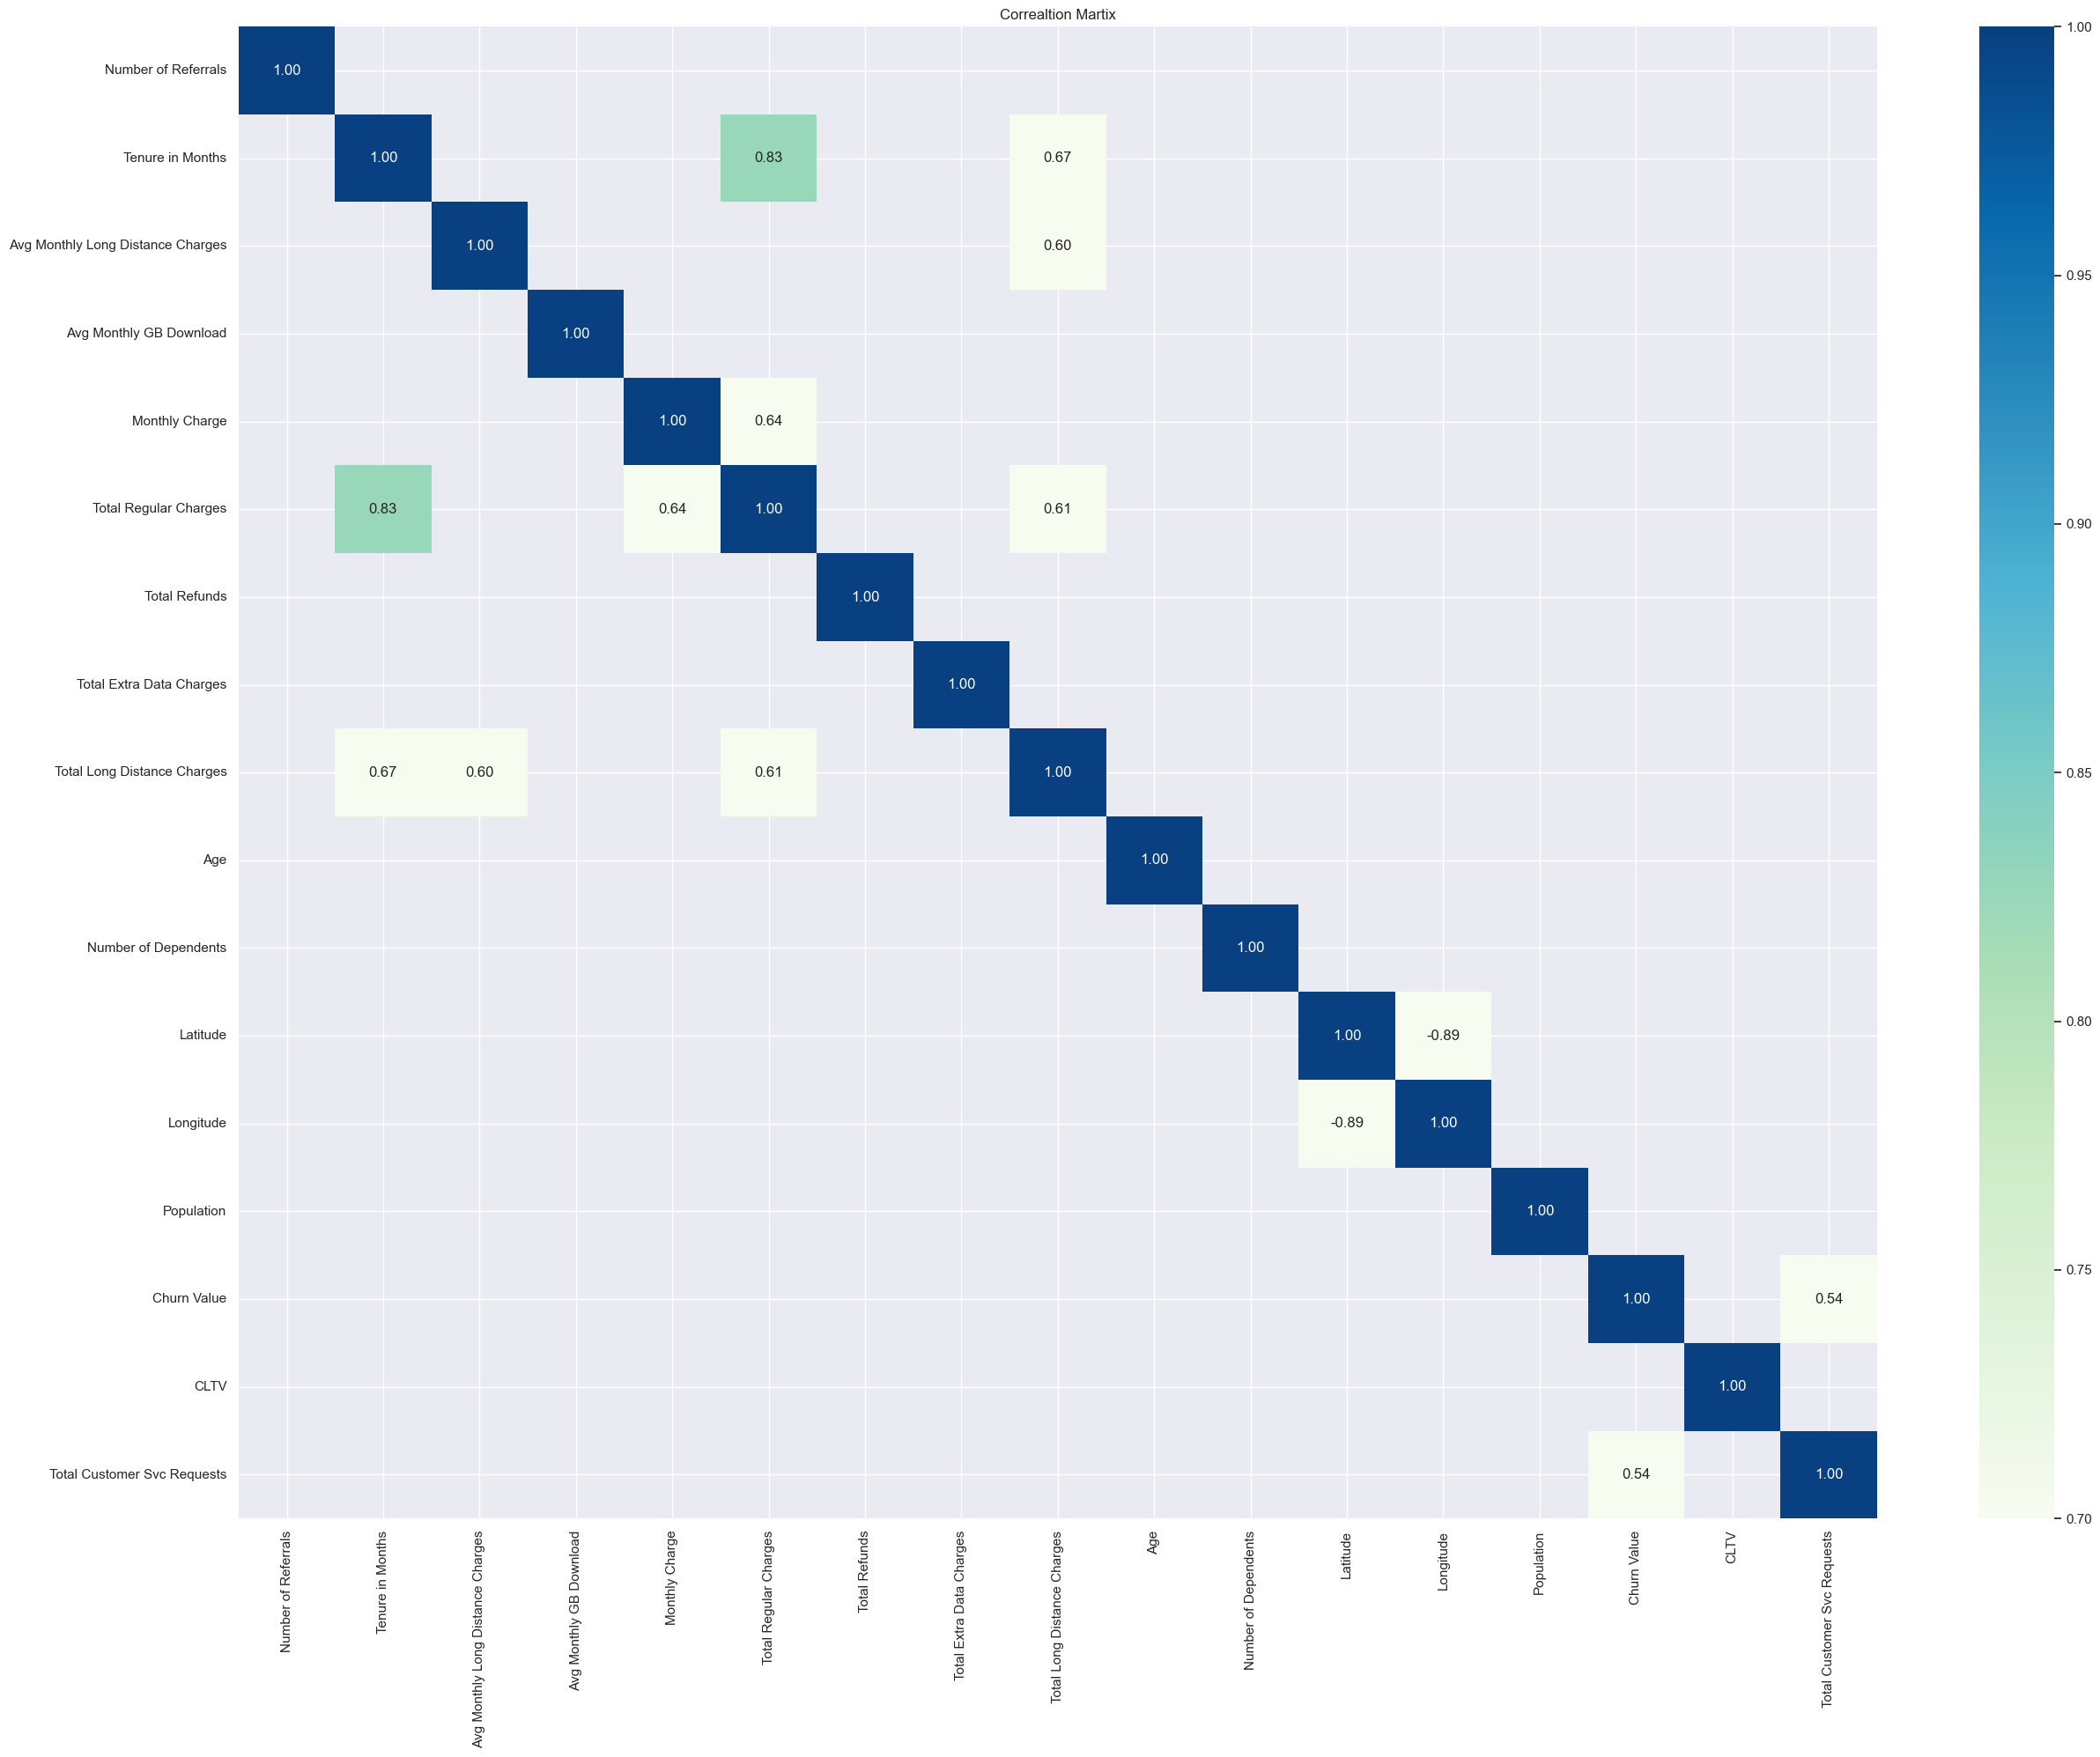

In [31]:
high_corr_mat = correaltion_martix[abs(correaltion_martix) >= 0.5]

plt.figure(figsize=(30, 22))

sns.heatmap(high_corr_mat, annot=True, fmt='.2f', cmap='GnBu', vmin=0.7, vmax=1)
tiile = plt.title('Correaltion Martix')

In [32]:
# Calculate the correlation matrix
correlation_matrix = jb_link_org_dataset.corr()

# Set the correlation threshold
threshold = 0.7

# Find pairs of highly correlated variables
high_corr_pairs = np.where(abs(correlation_matrix) >= threshold)

high_corr_pairs

# Create a list of variables to remove
variables_to_remove = set()
for i, j in zip(*high_corr_pairs):
    if i != j and i not in variables_to_remove and j not in variables_to_remove:
        # Keep one variable and remove the other from the pair
        correlation_i = correlation_matrix.iloc[i, i]
        correlation_j = correlation_matrix.iloc[j, j]
        if correlation_i >= correlation_j:
            variables_to_remove.add(j)
        else:
            variables_to_remove.add(i)

# Remove the highly correlated variables from the DataFrame
#df_filtered = jb_link_org_dataset.drop(columns=variables_to_remove, axis=1)

# Plot the correlation matrix of the remaining variables
#plt.figure(figsize=(10, 8))
#sns.heatmap(df_filtered.corr(), annot=True, fmt='.2f', cmap='GnBu', vmin=0.7, vmax=1)
#plt.title('Correlation Matrix (After Removing High Correlation)')
#plt.show()

In [33]:
# Drop column that have high correlation to prevent redudancy
jb_link_org_dataset.drop(columns = ['Referred a Friend', 'Number of Dependents', 'Latitude', 'Longitude', 'Total Regular Charges'], inplace=True)

In [34]:
jb_link_org_dataset.head(10)

Number of Referrals  Tenure in Months  Offer  Phone Service  \
0                    0                 1      0              0   
1                    1                 8      5              1   
2                    0                18      4              1   
3                    1                25      3              1   
4                    1                37      3              1   
5                    0                27      3              1   
6                    1                 1      5              1   
7                    6                58      2              0   
8                    0                15      4              1   
9                    0                 7      5              1   

   Avg Monthly Long Distance Charges  Multiple Lines  Internet Service  \
0                               0.00               0                 1   
1                              48.85               1                 1   
2                              11.33               1                 1   
3                              19.76               0                 1   
4                               6.33               1                 1   
5                               3.33               1                 1   
6                              15.28               0                 1   
7                               0.00               0                 1   
8                              44.07               1                 1   
9                              26.95               0                 1   

   Internet Type  Avg Monthly GB Download  Online Security  Online Backup  \
0              2                        9                0              0   
1              0                       19                0              1   
2              2                       57                0              0   
3              2                       13                0              1   
4              0                       15                0              0   
5              2                       20                0              0   
6              0                       33                0              0   
7              0                       26                0              1   
8              0                       21                0              0   
9              1                       20                1              0   

   Device Protection Plan  Premium Tech Support  Streaming TV  \
0                       1                     0             0   
1                       0                     0             0   
2                       0                     0             1   
3                       1                     0             1   
4                       0                     0             0   
5                       1                     0             0   
6                       0                     0             0   
7                       1                     0             0   
8                       0                     0             0   
9                       0                     0             0   

   Streaming Movies  Streaming Music  Unlimited Data  Contract  \
0                 1                0               0         0   
1                 0                0               0         0   
2                 1                1               1         0   
3                 1                0               0         0   
4                 0                0               0         0   
5                 0                0               0         0   
6                 0                0               0         0   
7                 1                0               0         0   
8                 0                0               0         0   
9                 0                0               0         0   

   Paperless Billing  Payment Method  Monthly Charge  Total Refunds  \
0                  1               0           41.24           0.00   
1                  1        

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

featuers_vars = jb_link_org_dataset.drop('Churn Value', axis=1)

target_var= jb_link_org_dataset['Churn Value']


X_train, X_test, y_train, y_test = train_test_split(featuers_vars,target_var, test_size=0.2,random_state=0)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 34)
X_test shape: (1409, 34)
y_train shape: (5634,)
y_test shape: (1409,)


## Remove Outlier from Train Data using Z-Score

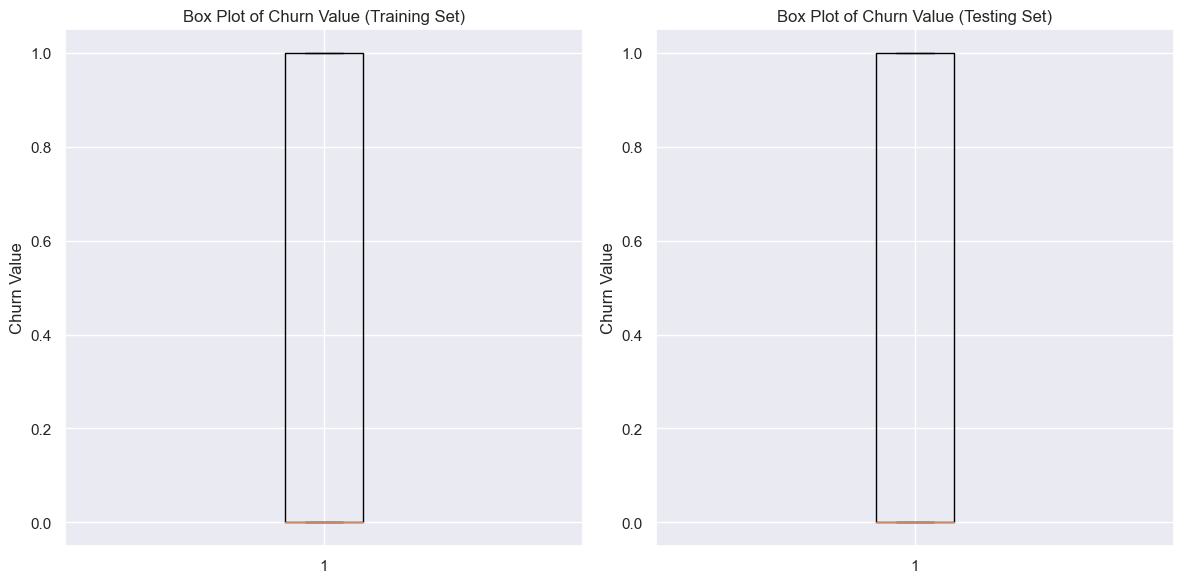

In [36]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Box plot for 'Churn Value' in the training set
plt.subplot(1, 2, 1)
plt.boxplot(y_train)
plt.title('Box Plot of Churn Value (Training Set)')
plt.ylabel('Churn Value')

# Box plot for 'Churn Value' in the testing set
plt.subplot(1, 2, 2)
plt.boxplot(y_test)
plt.title('Box Plot of Churn Value (Testing Set)')
plt.ylabel('Churn Value')

plt.tight_layout()
plt.show()

In [37]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 
                    'Total Long Distance Charges', 'Population']

# Calculate summary statistics for cleaned training data
summary_stats = X_train[selected_columns].describe()
print(summary_stats)


       Avg Monthly GB Download  Total Refunds  Total Extra Data Charges  \
count                  5634.00        5634.00                   5634.00   
mean                     21.14           2.00                    276.94   
std                      20.90           7.95                    679.83   
min                       0.00           0.00                      0.00   
25%                       4.00           0.00                      0.00   
50%                      17.00           0.00                      0.00   
75%                      28.00           0.00                    180.75   
max                      94.00          49.76                   6477.00   

       Total Long Distance Charges  Population  
count                      5634.00     5634.00  
mean                        755.88    22061.74  
std                         852.04    21181.68  
min                           0.00       11.00  
25%                          72.56     2296.00  
50%                         41

In [38]:
# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# # Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


decision_tree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [40]:
#final model of decision tree
top_model_decision_tree = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')

top_model_decision_tree.fit(X_train, y_train)

MODEL_TRAIN_SCORE = top_model_decision_tree.score(X_train, y_train)

print(f"Training score for Model: {MODEL_TRAIN_SCORE * 100:.2f}%")

#test model

TEST_MODEL_SCORE = top_model_decision_tree.score(X_test, y_test)

print(f"Testing score for Model: {TEST_MODEL_SCORE * 100:.2f}%")


Training score for Model: 86.27%
Testing score for Model: 82.75%


In [41]:
from sklearn.metrics import accuracy_score

y_pred = top_model_decision_tree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 82.75 %


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8275372604684174
Precision Score :  0.8275372604684174
Recall Score :  0.8275372604684174
Jaccard Score :  0.7058111380145279
Log Loss :  6.216187206213959


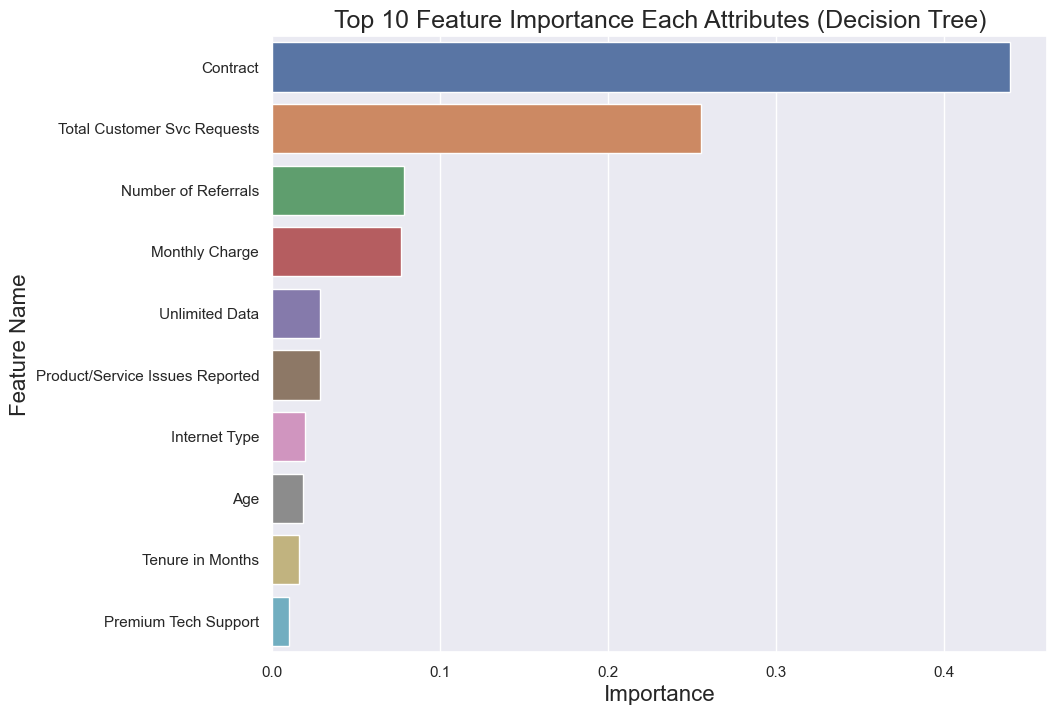

In [43]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": top_model_decision_tree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


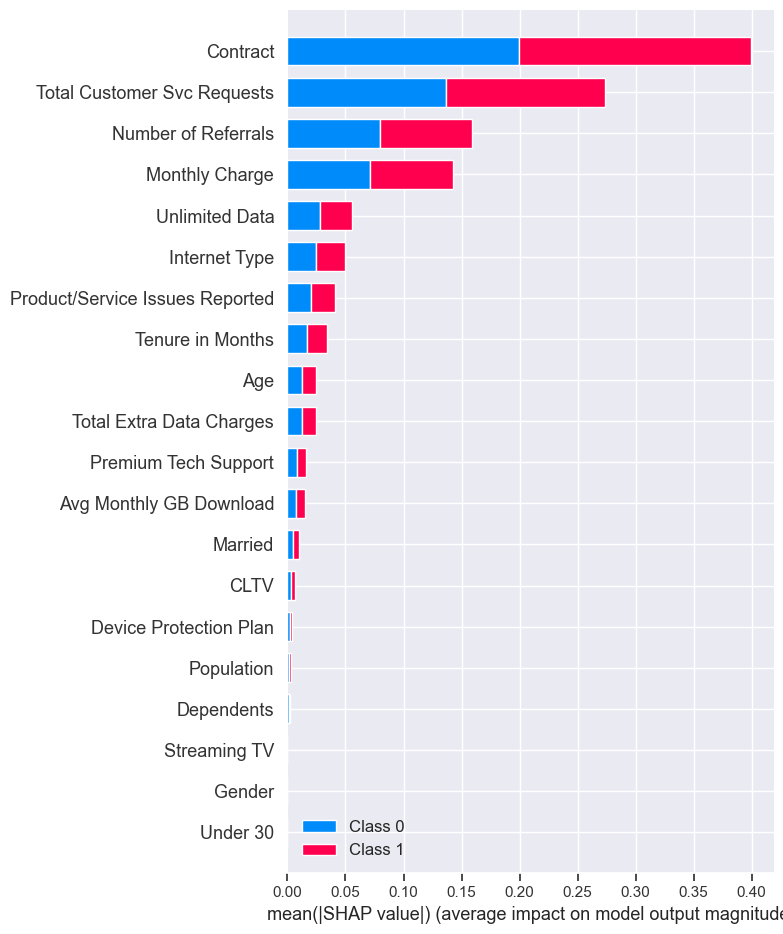

In [44]:
#features are contributing the most to those predictions.
import shap
explainer = shap.TreeExplainer(top_model_decision_tree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## Performance Metrics


In [45]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [46]:
predictions = top_model_decision_tree.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

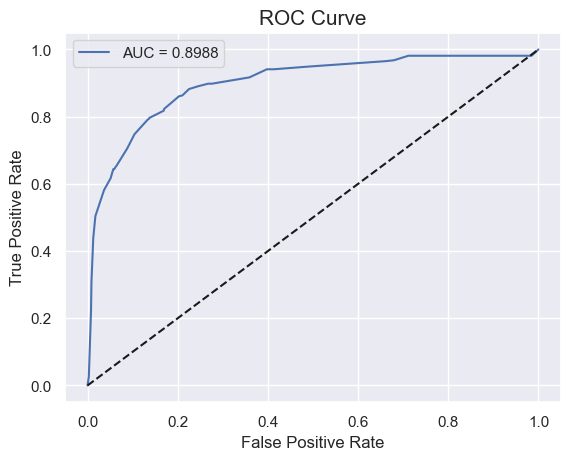

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = top_model_decision_tree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [48]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

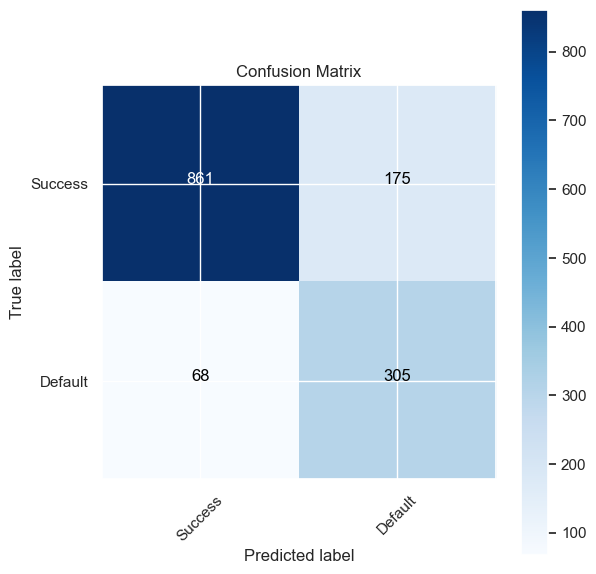

In [49]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

# # Random Forest Classifier

In [52]:
# Cleaning test sets to avoid future warning messages
y_train = y_train.values.ravel() 
y_test = y_test.values.ravel() 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Set the random state for reproducibility
fit_rfc = RandomForestClassifier(random_state=42 , class_weight='balanced')

# Define the parameter grid for hyperparameter tuning
param_grid = {
   'max_depth': [2,3,4],
   'bootstrap': [True, False],
   'max_features': ['auto', 'sqrt', 'log2', None],
   'criterion': ['gini', 'entropy'],
   'random_state': [0, 42]
}

# Create a timer to measure the time taken for the grid search
start_time = time.time()

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(fit_rfc, cv = 10,
                     param_grid=param_grid, 
                     n_jobs = 3)
grid_search.fit(X_train, y_train)

# Calculate the elapsed time for the grid search
end_time = time.time()
elapsed_time = end_time - start_time

# Print the best hyperparameters and the elapsed time
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Elapsed Time for Grid Search: {elapsed_time:.2f} seconds")



240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
173 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParam

Best Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'random_state': 0}
Elapsed Time for Grid Search: 671.28 seconds


In [63]:
# Set best parameters given by grid search 
fit_rfc.set_params(criterion = 'gini',
                  max_features = 'sqrt', 
                  max_depth = 4,
                  random_state = 0,
                  bootstrap = True
                  )

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=15,
                       oob_score=True, random_state=0, warm_start=True)

## oob rate

In [ ]:
'''fit_rfc.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rfc.set_params(n_estimators=i)
    fit_rfc.fit(X_train, y_train)

    oob_error = 1 - fit_rfc.oob_score_
    error_rate[i] = oob_error'''


In [66]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

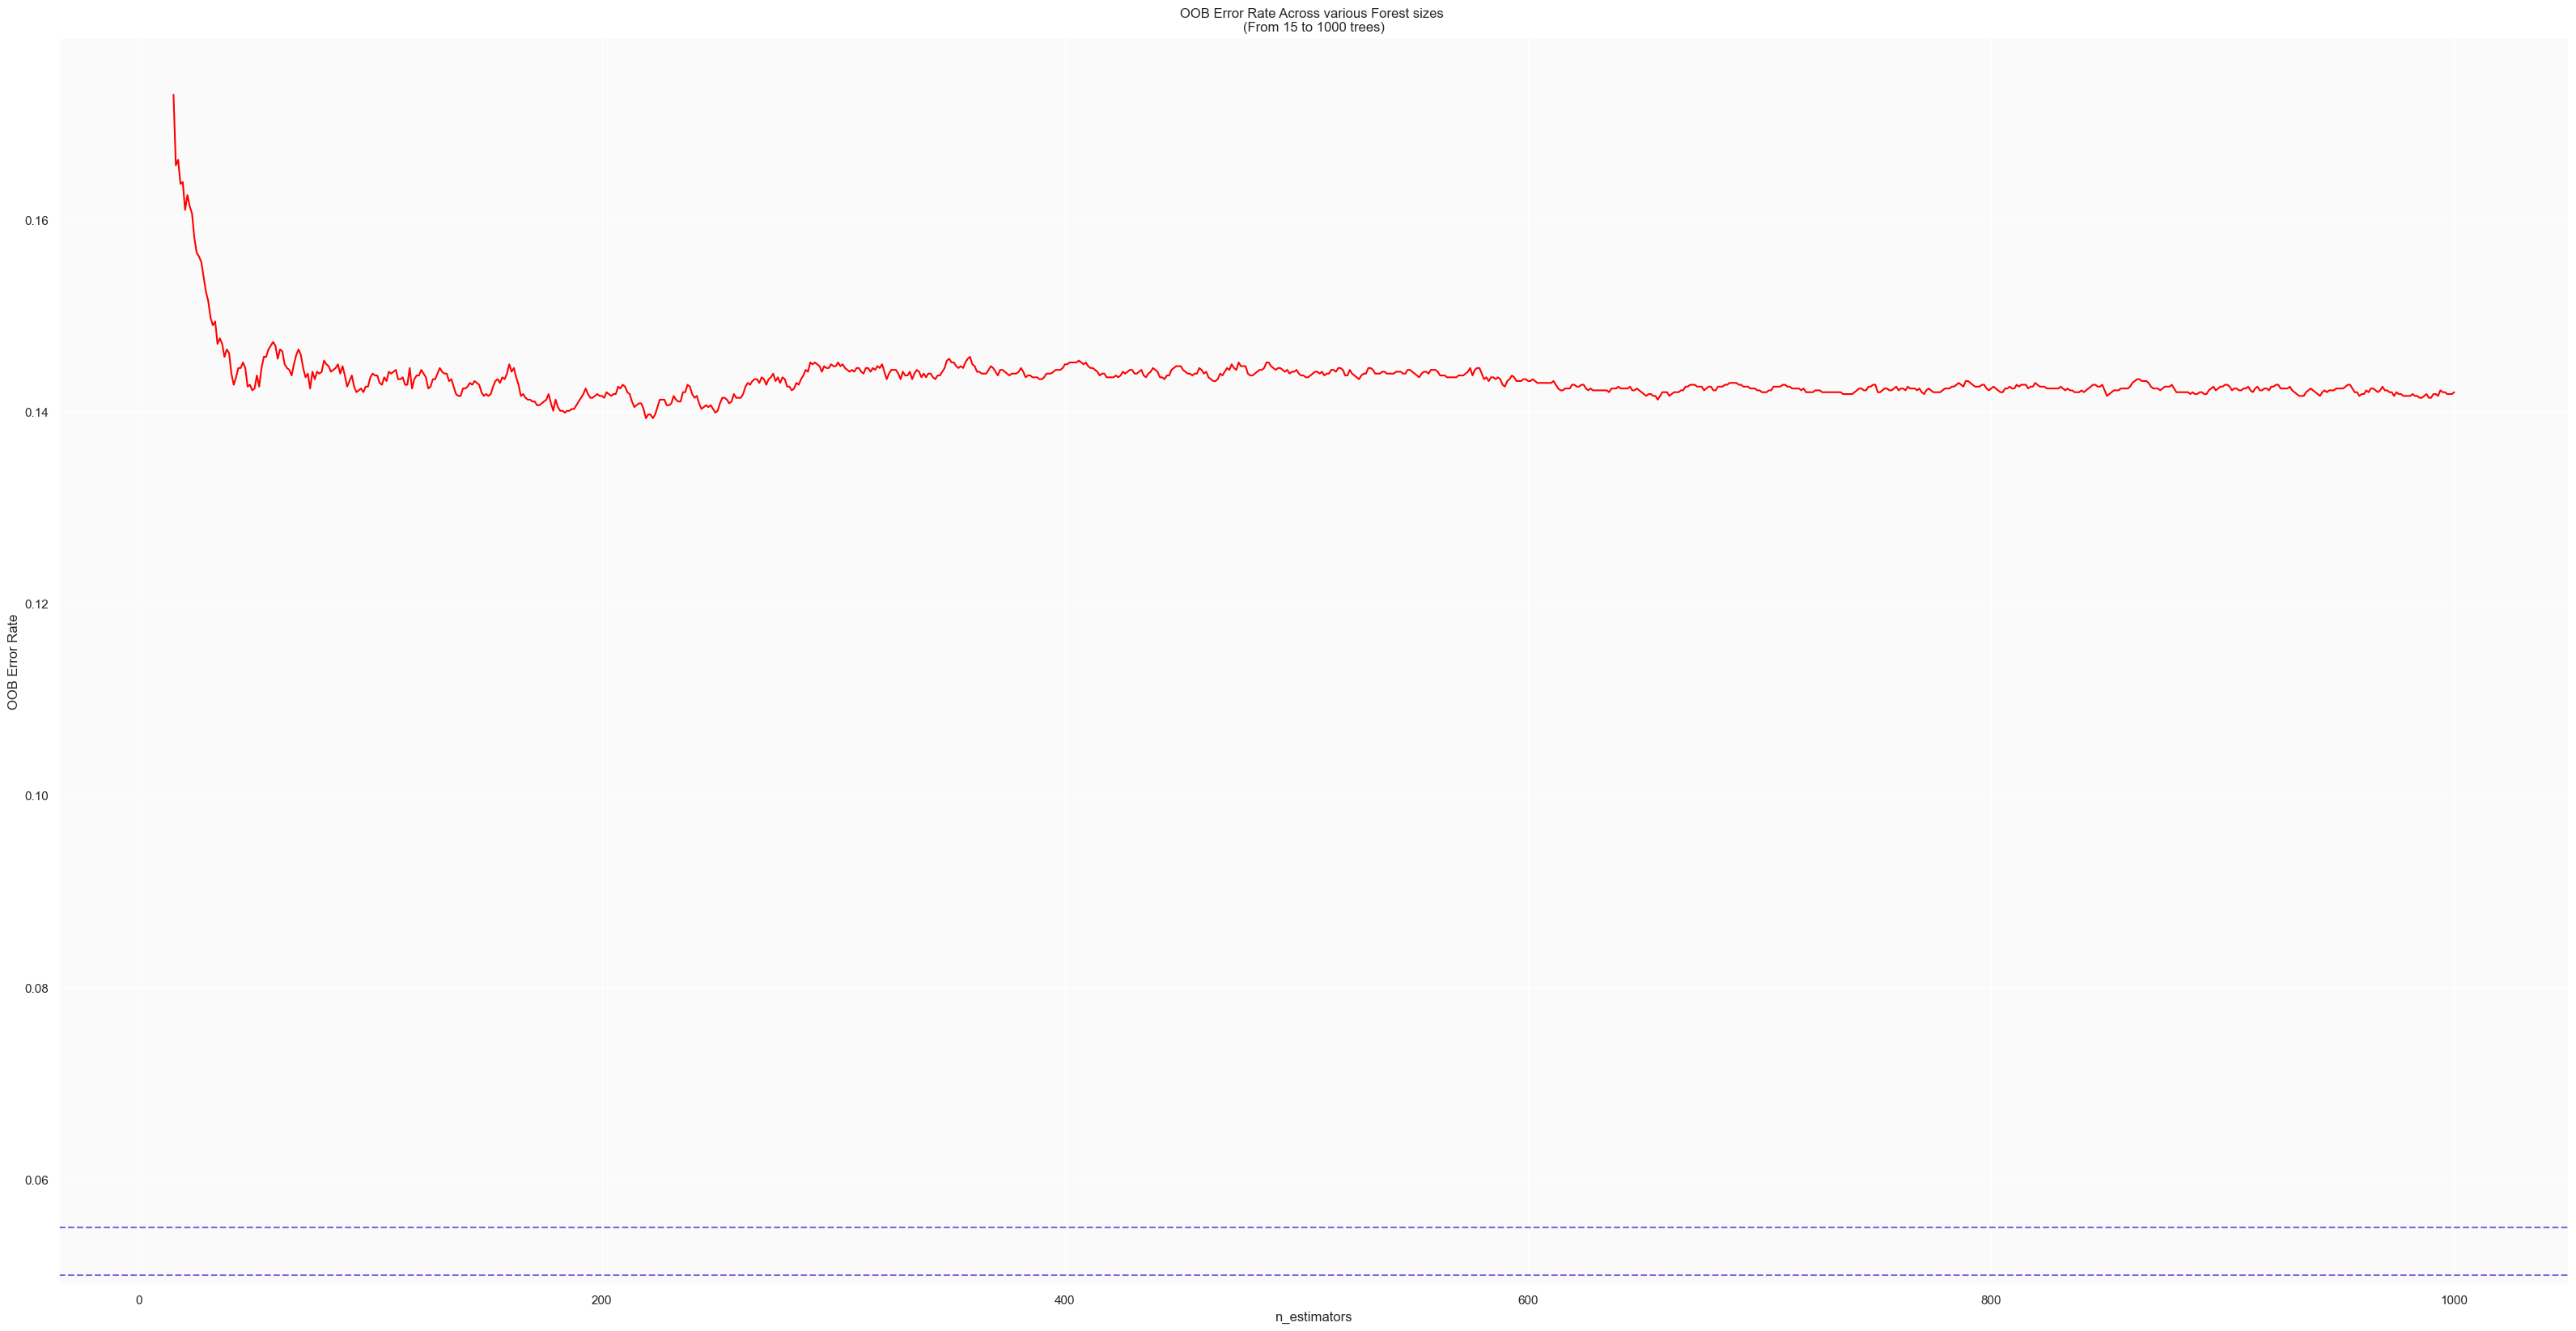

In [70]:
fig, ax = plt.subplots(figsize=(40, 20))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [71]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.14491


In [72]:
# Refine the tree via OOB Output
fit_rfc.set_params(n_estimators=300,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=300,
                       random_state=0)

# # Train the RandomForest

In [73]:
fit_rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=300,
                       random_state=0)

In [74]:
y_pred = fit_rfc.predict(X_test)

print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 84.32 %


In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8431511710432931
Precision Score :  0.8431511710432931
Recall Score :  0.8431511710432931
Jaccard Score :  0.7288343558282209
Log Loss :  5.653404825404464


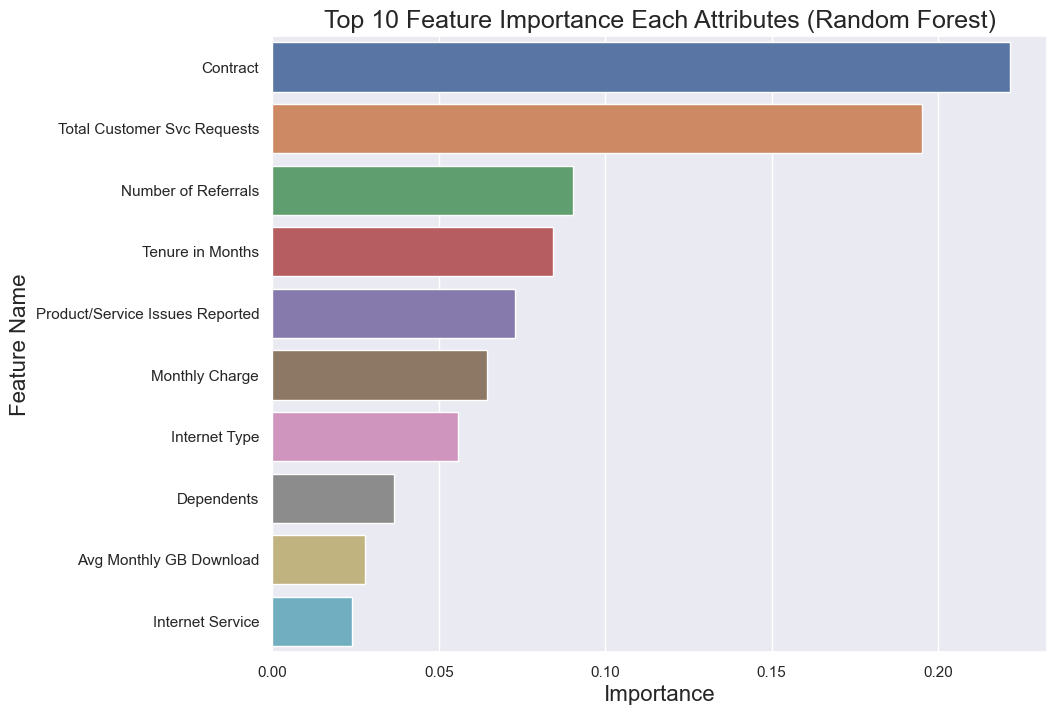

In [76]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": fit_rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

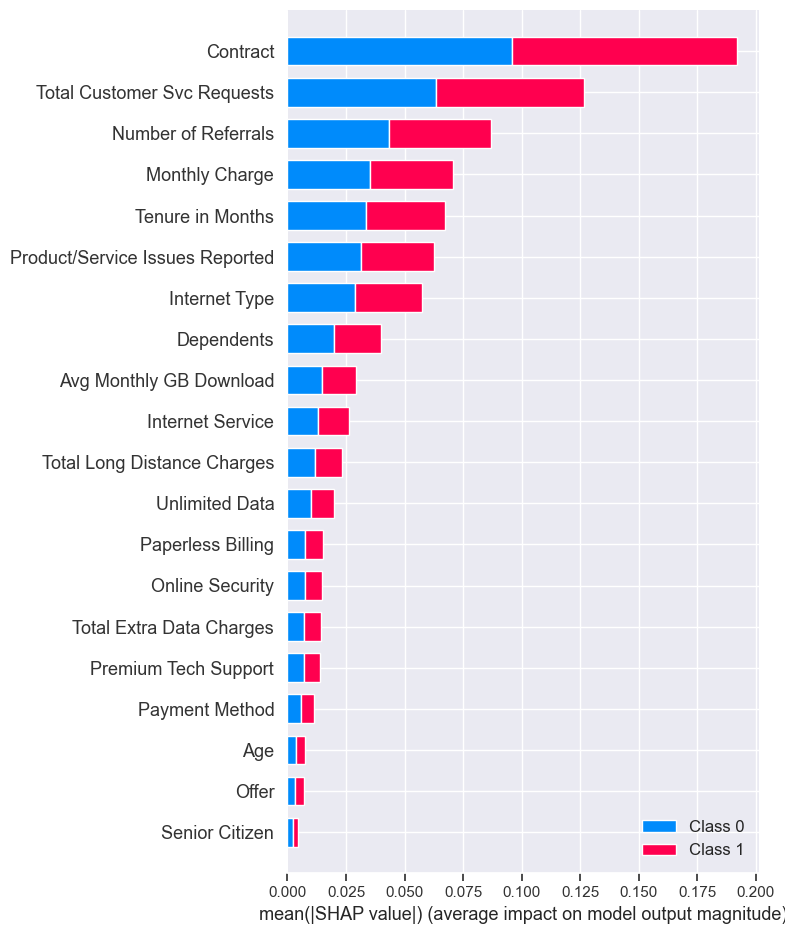

In [82]:
import shap

explainer = shap.TreeExplainer(fit_rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


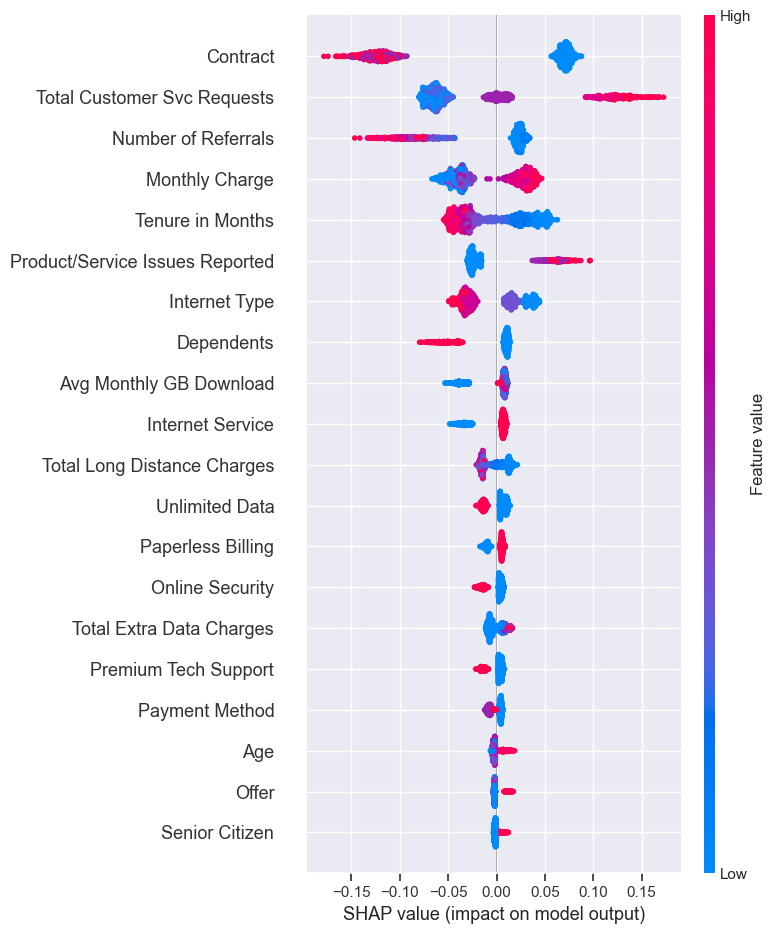

In [83]:
# compute SHAP values
explainer = shap.TreeExplainer(fit_rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8431511710432931')

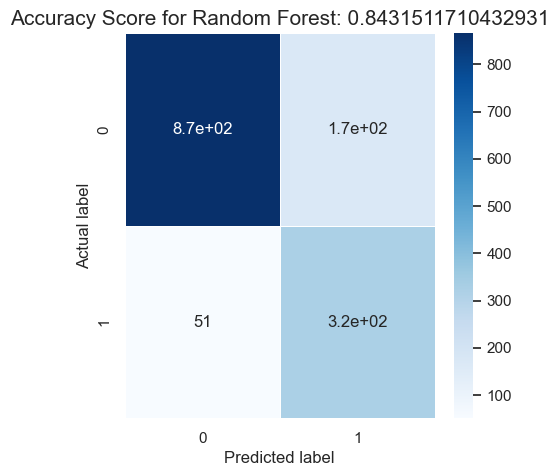

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(fit_rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [96]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

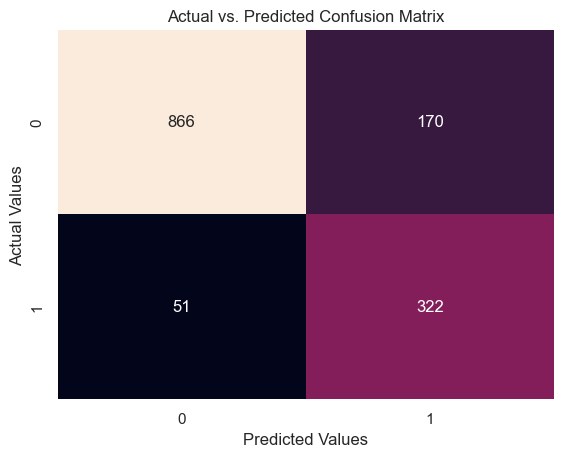

In [97]:
conf_mat = create_conf_mat(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

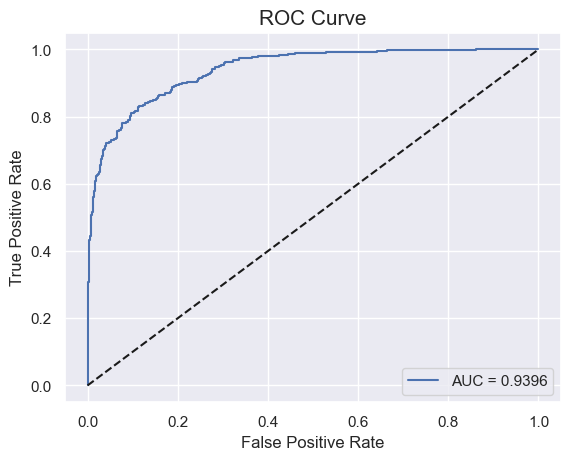

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = fit_rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)


fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()